In [58]:
import pandas as pd
import numpy as np
import wrds
import seaborn as sns
import os
import io
import dateutil
import collections
import time
from datetime import datetime
#import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
% matplotlib inline


In [59]:
#report using IS and BS ratios and explain teh reasoning behind each ratio and why a change in that raio can affect
#earnings

In [60]:
#use all the companies
# add AR, Inv, as features
#loop the whole plotting process and save as png

In [61]:
db= wrds.Connection(wrds_username='serqas23')

Enter your WRDS username [sergesondji]:serqas23
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [62]:
Start_year = 1980
End_year = 2018

In [236]:
Query_string ="select gvkey,fyear,conm,act,ap,invt,lct,ebit,at,bkvlps,cogs,dvt,ib,lt,ni,revt,seq from comp.funda where gvkey='005073' OR gvkey='009563' OR gvkey='006066' OR gvkey='007875' OR gvkey='002176' OR gvkey='009667' OR gvkey='005047' OR gvkey='004839' OR gvkey='003022'  OR gvkey='006307' OR gvkey='011259'OR gvkey='007585' OR gvkey='005606' OR gvkey='003282' OR gvkey='005680' OR gvkey='006829' OR gvkey='004503'  OR gvkey='009899' OR gvkey='002176' OR gvkey='002136' OR gvkey='009653' OR gvkey='003813' OR gvkey='002991'"

In [259]:
Full_db = db.raw_sql(Query_string)


In [238]:
years = list(range(Start_year,End_year))

In [239]:
DBfrom1980to2017 = Full_db[Full_db.fyear.isin(years)]

In [240]:
gvkeylist = set(DBfrom1980to2017['gvkey'].tolist())



In [241]:
DBfrom1980to2017nonans = DBfrom1980to2017.dropna(axis=0, how='any')



1. AT -- Assets 
2. Total BKVLPS 
3. Book Value Per Share
4. COGS -- Cost of Goods Sold 
5. DVT -- Dividends - Total
6. IB -- Income Before Extraordinary Items 
7. LT -- Liabilities - Total
8. NI -- Net Income (Loss) 
9. REVT -- Revenue - Total SALE -- Sales/Turnover (Net)
10. SEQ -- Stockholders' Equity - Total
11. ACT -- Current Assets
12. Ap -- Account Payable
13. ARTFS --- Account receivable*
14. invt -- Inventory
15. lct -- Current Liabilities
16.
17.
18.
19.
20.



In [242]:
DBfrom1980to2017nonans = DBfrom1980to2017nonans.reset_index(drop=True)
DBfrom1980to2017nonans.head()


gvkey   fyear                        conm       act      ap   invt  \
0  002136  1984.0  VERIZON COMMUNICATIONS INC  2600.400  1290.7  121.8   
1  002136  1985.0  VERIZON COMMUNICATIONS INC  2683.699  1227.1  242.3   
2  002136  1986.0  VERIZON COMMUNICATIONS INC  2755.600  1292.2  270.9   
3  002136  1987.0  VERIZON COMMUNICATIONS INC  2796.600  1523.6  298.6   
4  002136  1988.0  VERIZON COMMUNICATIONS INC  3206.400  1622.3  316.5   

        lct      ebit         at   bkvlps      cogs    dvt      ib         lt  \
0  2741.200  2114.780  18684.203  75.3744  4781.371  628.8   973.1  11175.799   
1  2831.899  2331.899  19788.305  79.3134  5288.445  678.7  1092.9  11867.095   
2  3593.800  2470.901  21090.805  41.8186  5576.496  717.3  1167.1  12770.197   
3  3183.800  2357.000  21245.100  44.1303  5860.800  762.3  1240.4  12503.200   
4  4265.200  2406.600  24729.200  46.5787  6119.500  806.3  1316.8  15552.500   

       ni       revt       seq  
0   973.1   8090.051  7508.499  
1  1092.9   9084.145  7921.270  
2  1167.1   9920.797  8320.697  
3  1240.4  10298.400  8741.900  
4  1316.8  10880.100  9176.700

## PCA Absolute values

In [243]:
# not using sale because it is the same feature as revenue 'revt'
features = ['at', 'bkvlps', 'cogs', 'dvt','ib','lt','ni','revt','seq', 'act', 'ap', 'invt','lct', 'ebit']
# Separating out the features
x = DBfrom1980to2017nonans.loc[:, features].values
#Standardizing the features
x = StandardScaler().fit_transform(x)

In [244]:
pca = PCA(n_components=2)
principalcomp= pca.fit_transform(x)
principalDF= pd.DataFrame (data=principalcomp, columns= ['Principal Component 1', 'Principal Component 2'])
principalDF.head()


Principal Component 1  Principal Component 2
0              -1.865788              -0.344629
1              -1.823800              -0.354241
2              -1.774843              -0.364724
3              -1.759634              -0.362545
4              -1.681437              -0.390131

In [245]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.69374214 0.09545596]


In [246]:
FinalDF= pd.concat([principalDF,DBfrom1980to2017nonans[['conm','fyear']] ], axis=1).sort_values('fyear')
FinalDF.head()


Principal Component 1  Principal Component 2  \
175              -1.400036               0.666114   
284              -1.026372              -0.478158   
574              -2.412147              -0.108542   
137               1.060266               0.456504   
34               -1.049057               0.144093   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

In [260]:
#look for code for shell company for oil 
CompanyList=set(DBfrom1980to2017nonans['conm'].tolist())
CompanyList

{u'AT&T INC',
 u'CHEVRON CORP',
 u'CHRYSLER CORP',
 u'COMPAQ COMPUTER CORP',
 u'EXXON MOBIL CORP',
 u'FORD MOTOR CO',
 u'GENERAL ELECTRIC CO',
 u'GENERAL MOTORS CO',
 u'HOME DEPOT INC',
 u'HP INC',
 u'INTL BUSINESS MACHINES CORP',
 u"LOWE'S COMPANIES INC",
 u'MOTOROLA SOLUTIONS INC',
 u'NEWELL BRANDS INC',
 u'SEARS HOLDINGS CORP',
 u'SEARS ROEBUCK & CO',
 u'SHELL OIL CO',
 u'SHERWIN-WILLIAMS CO',
 u'TARGET CORP',
 u'VERIZON COMMUNICATIONS INC',
 u'WALMART INC'}

In [248]:
Telecommunication = ['AT&T INC','VERIZON COMMUNICATIONS INC','MOTOROLA SOLUTIONS INC']
Oil = ['CHEVRON CORP','SHELL OIL CO','EXXON MOBIL CORP']
Auto =['CHRYSLER CORP','FORD MOTOR CO','GENERAL MOTORS CO']
Hardware = ["LOWE'S COMPANIES INC",'SHERWIN-WILLIAMS CO','HOME DEPOT INC']
Retail = ['WALMART INC','SEARS ROEBUCK & CO','TARGET CORP']
Conglomerate = ['GENERAL ELECTRIC CO','NEWELL BRANDS INC','BERKSHIRE HATHAWAY']
Computer = ['INTL BUSINESS MACHINES CORP','COMPAQ COMPUTER CORP','HP INC']

## Oil Plot

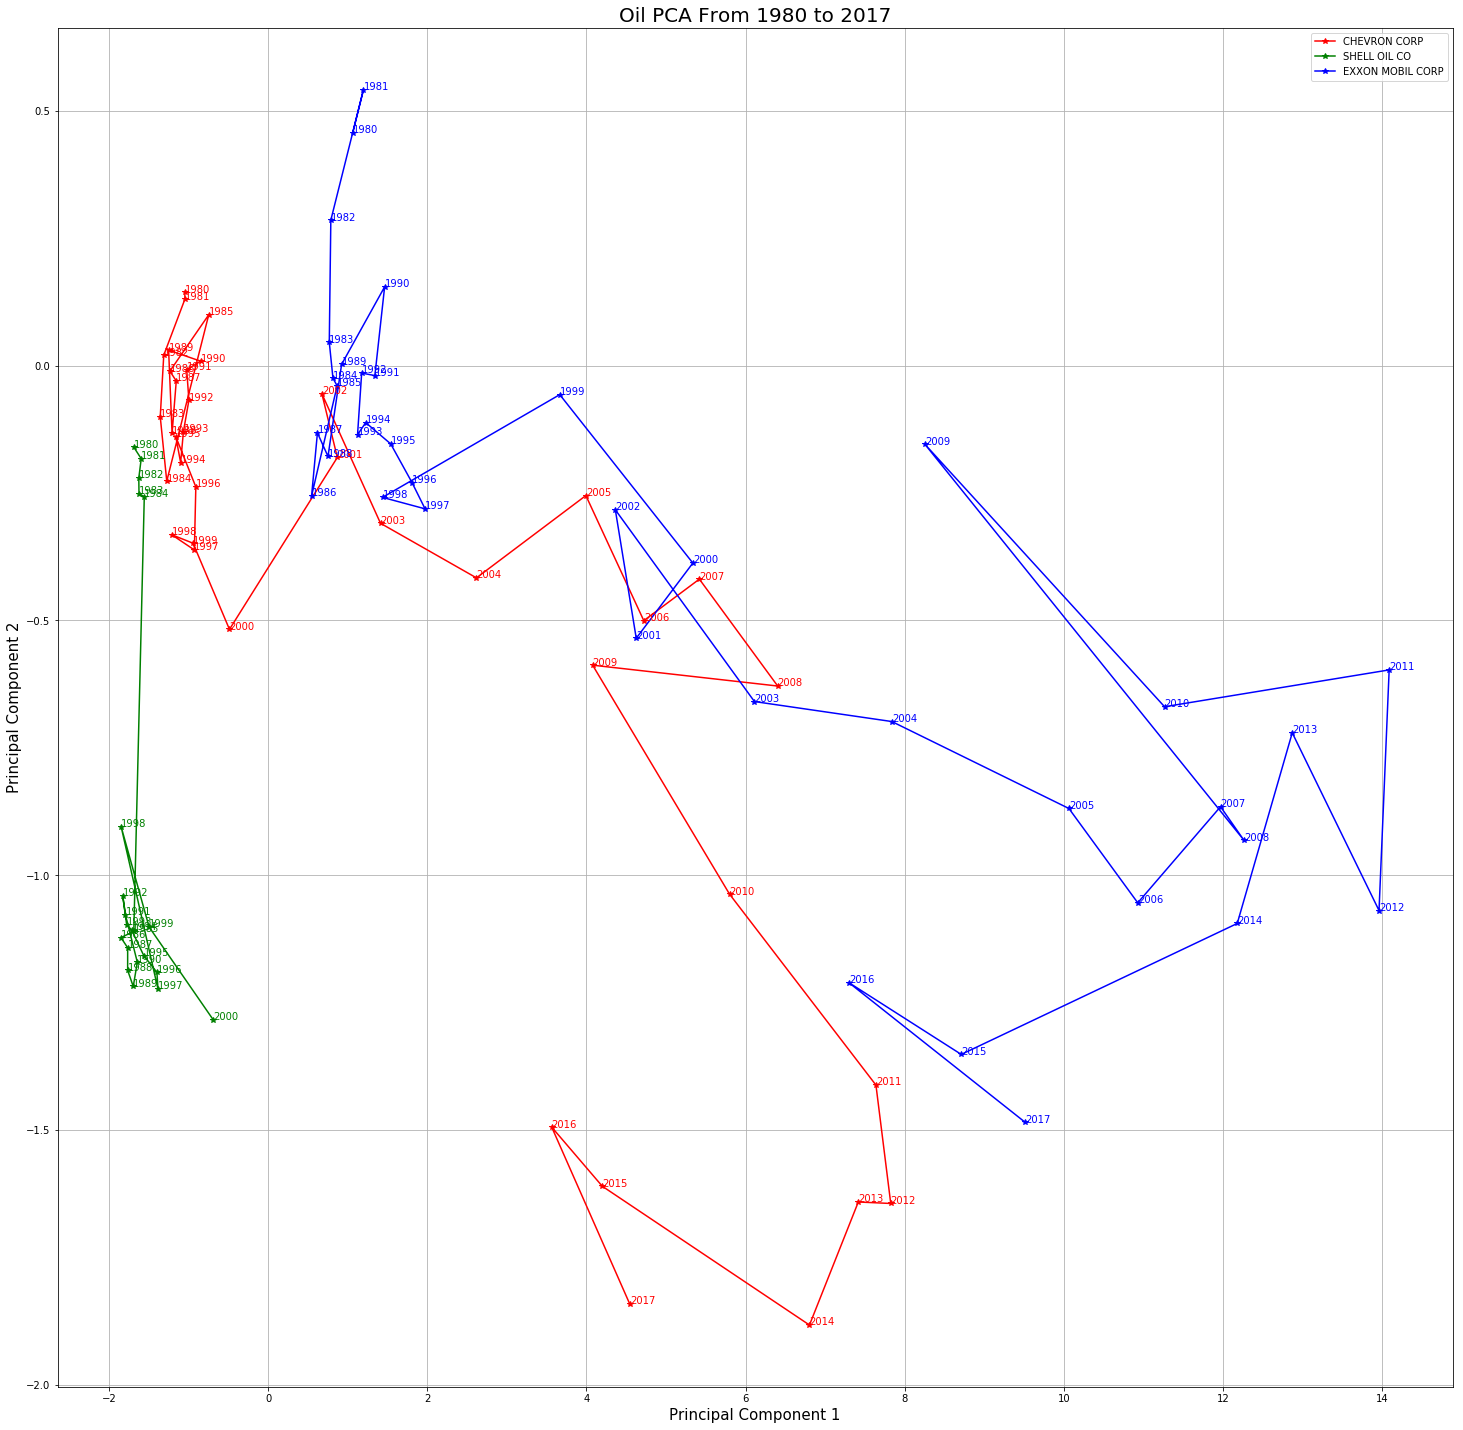

In [249]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

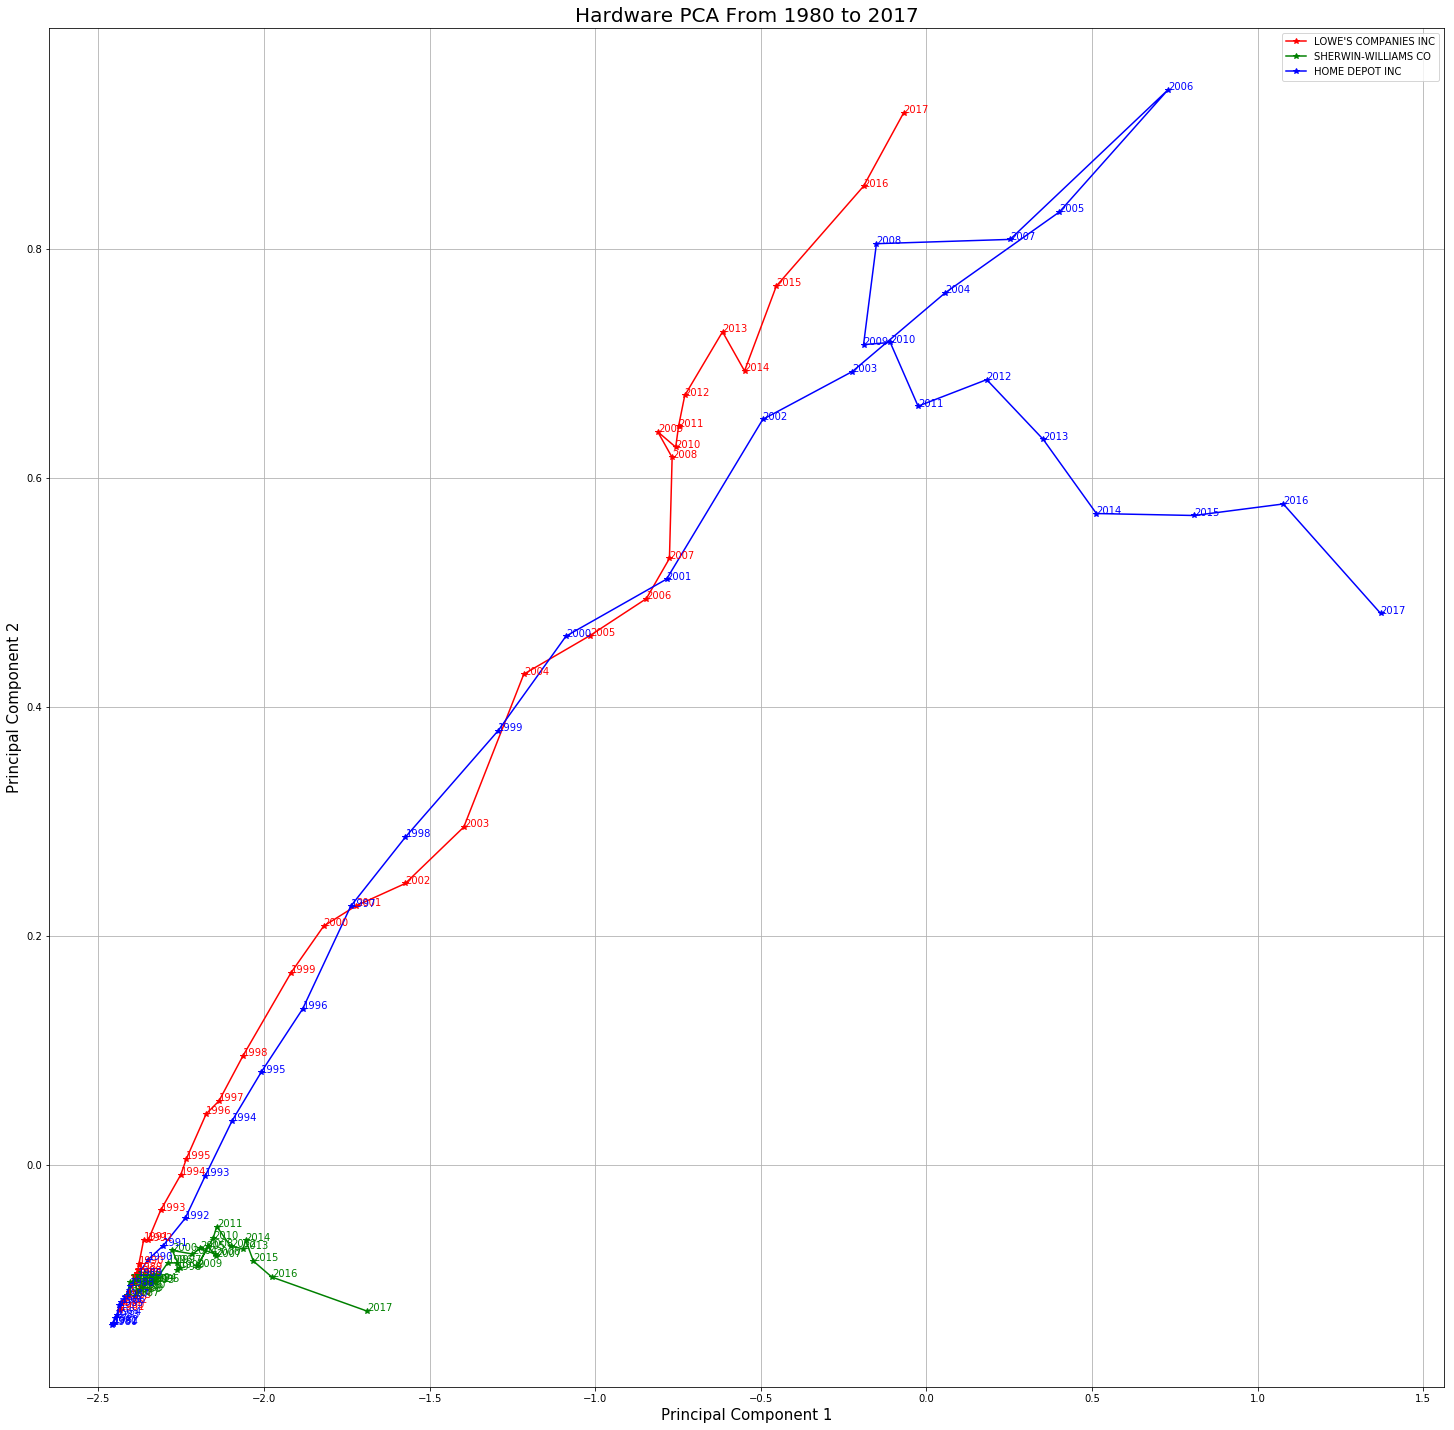

In [217]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware PCA From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Telecommunication Plot 

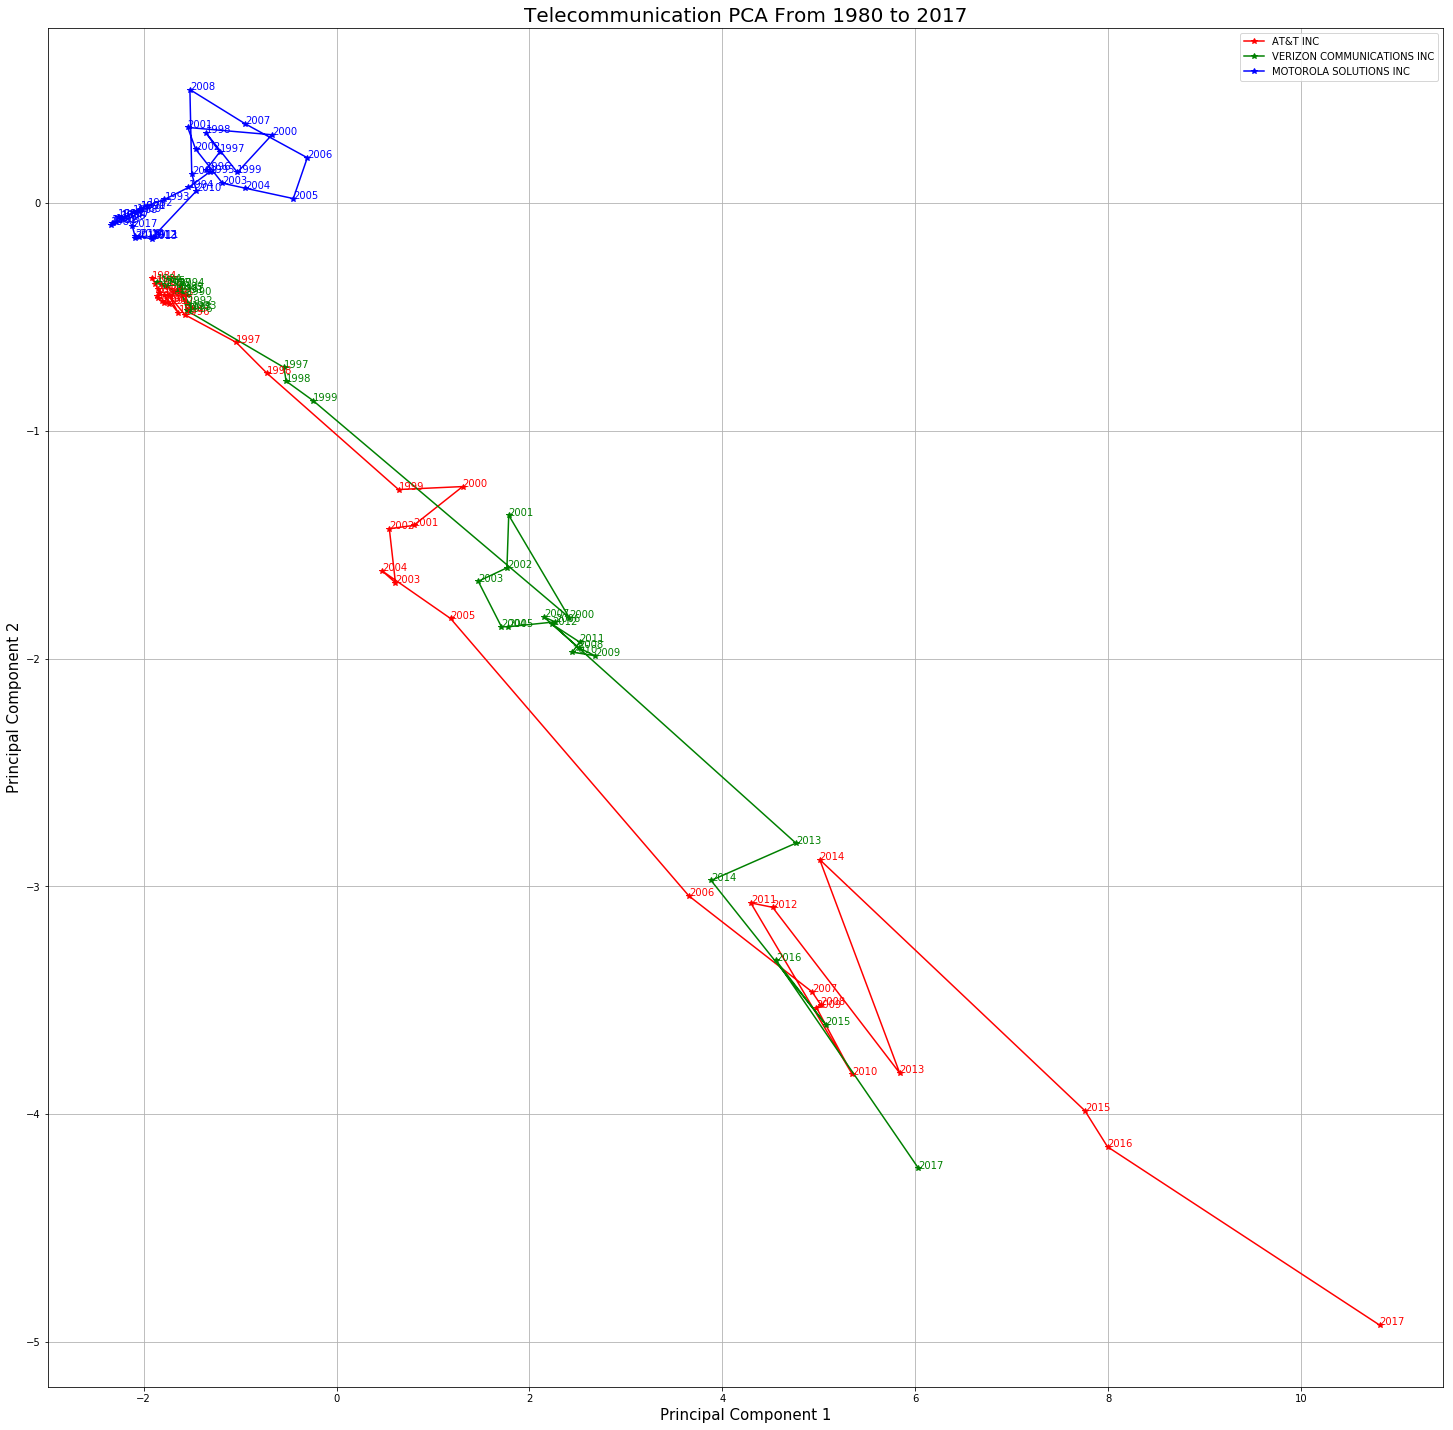

In [219]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Telecommunication PCA From 1980 to 2017', fontsize = 20)
CompanyList = Telecommunication
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

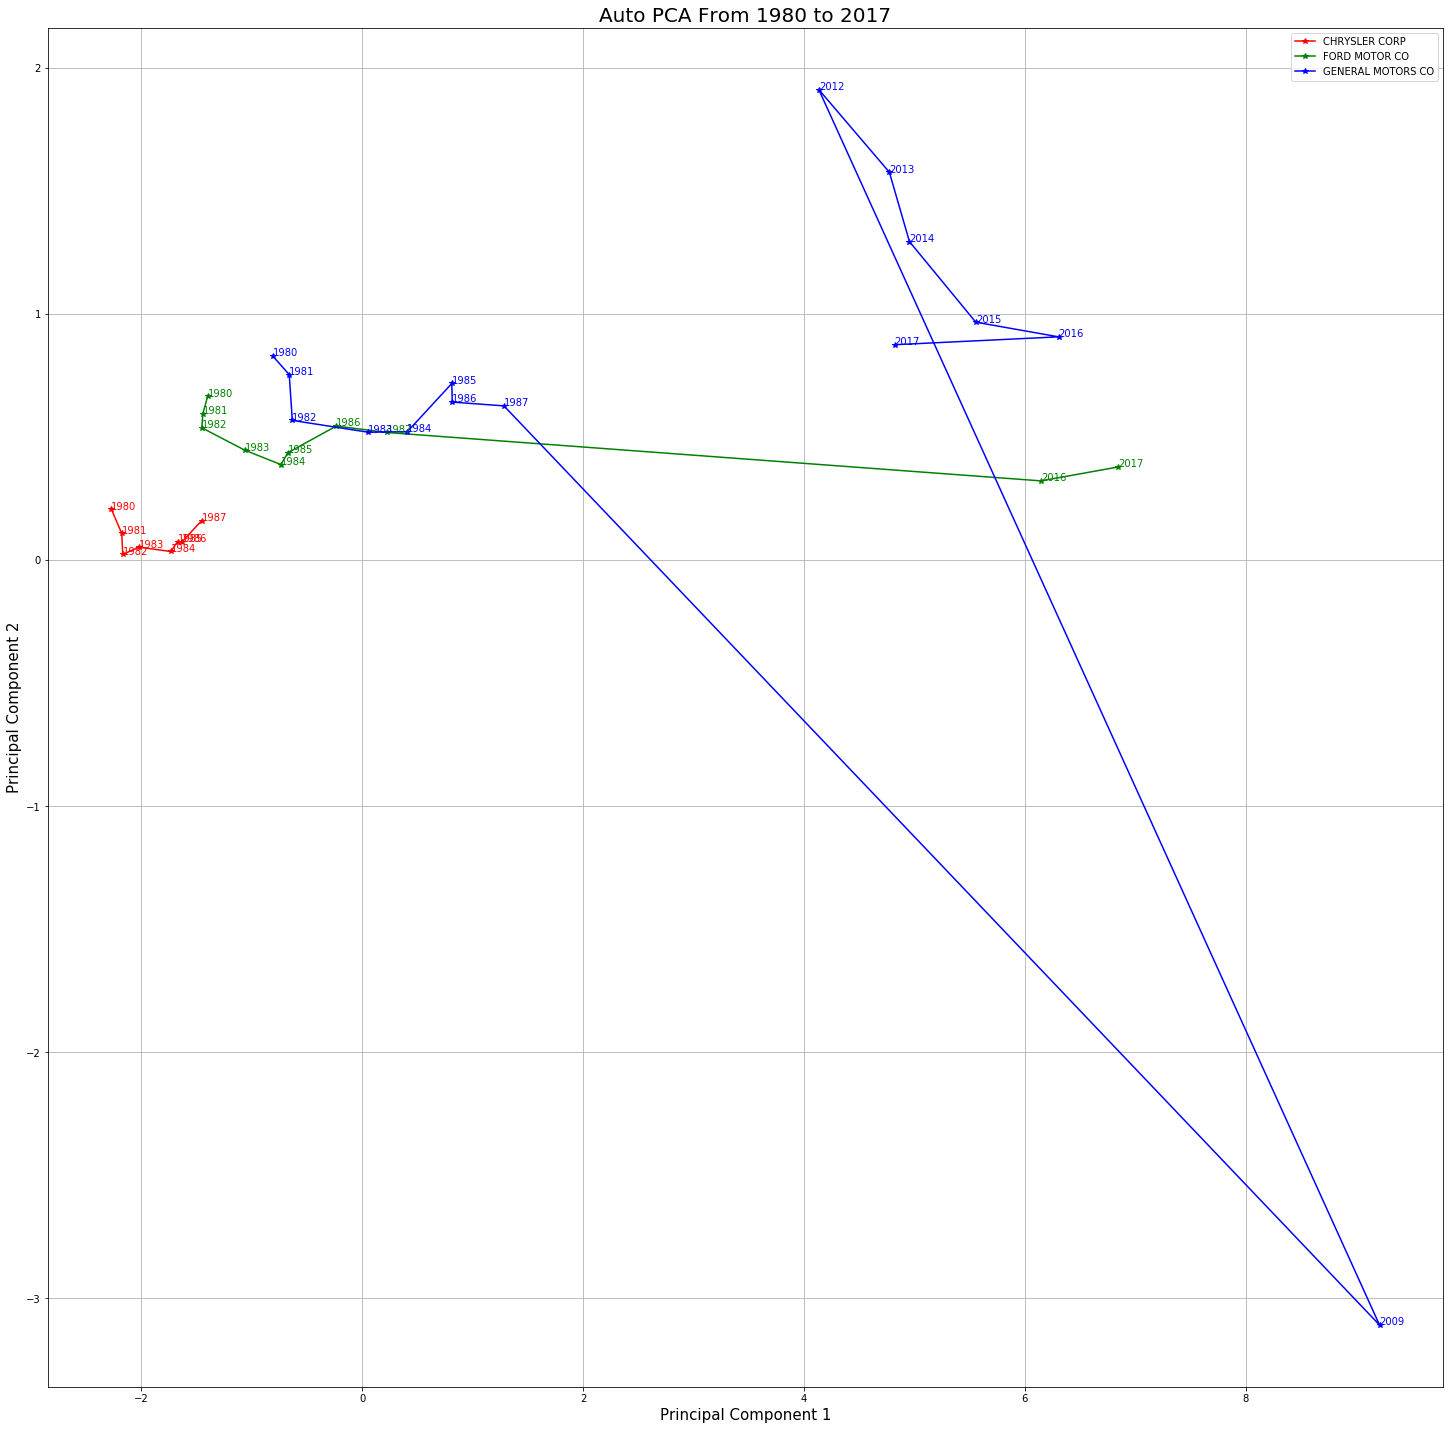

In [221]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto PCA From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Retail Plot 

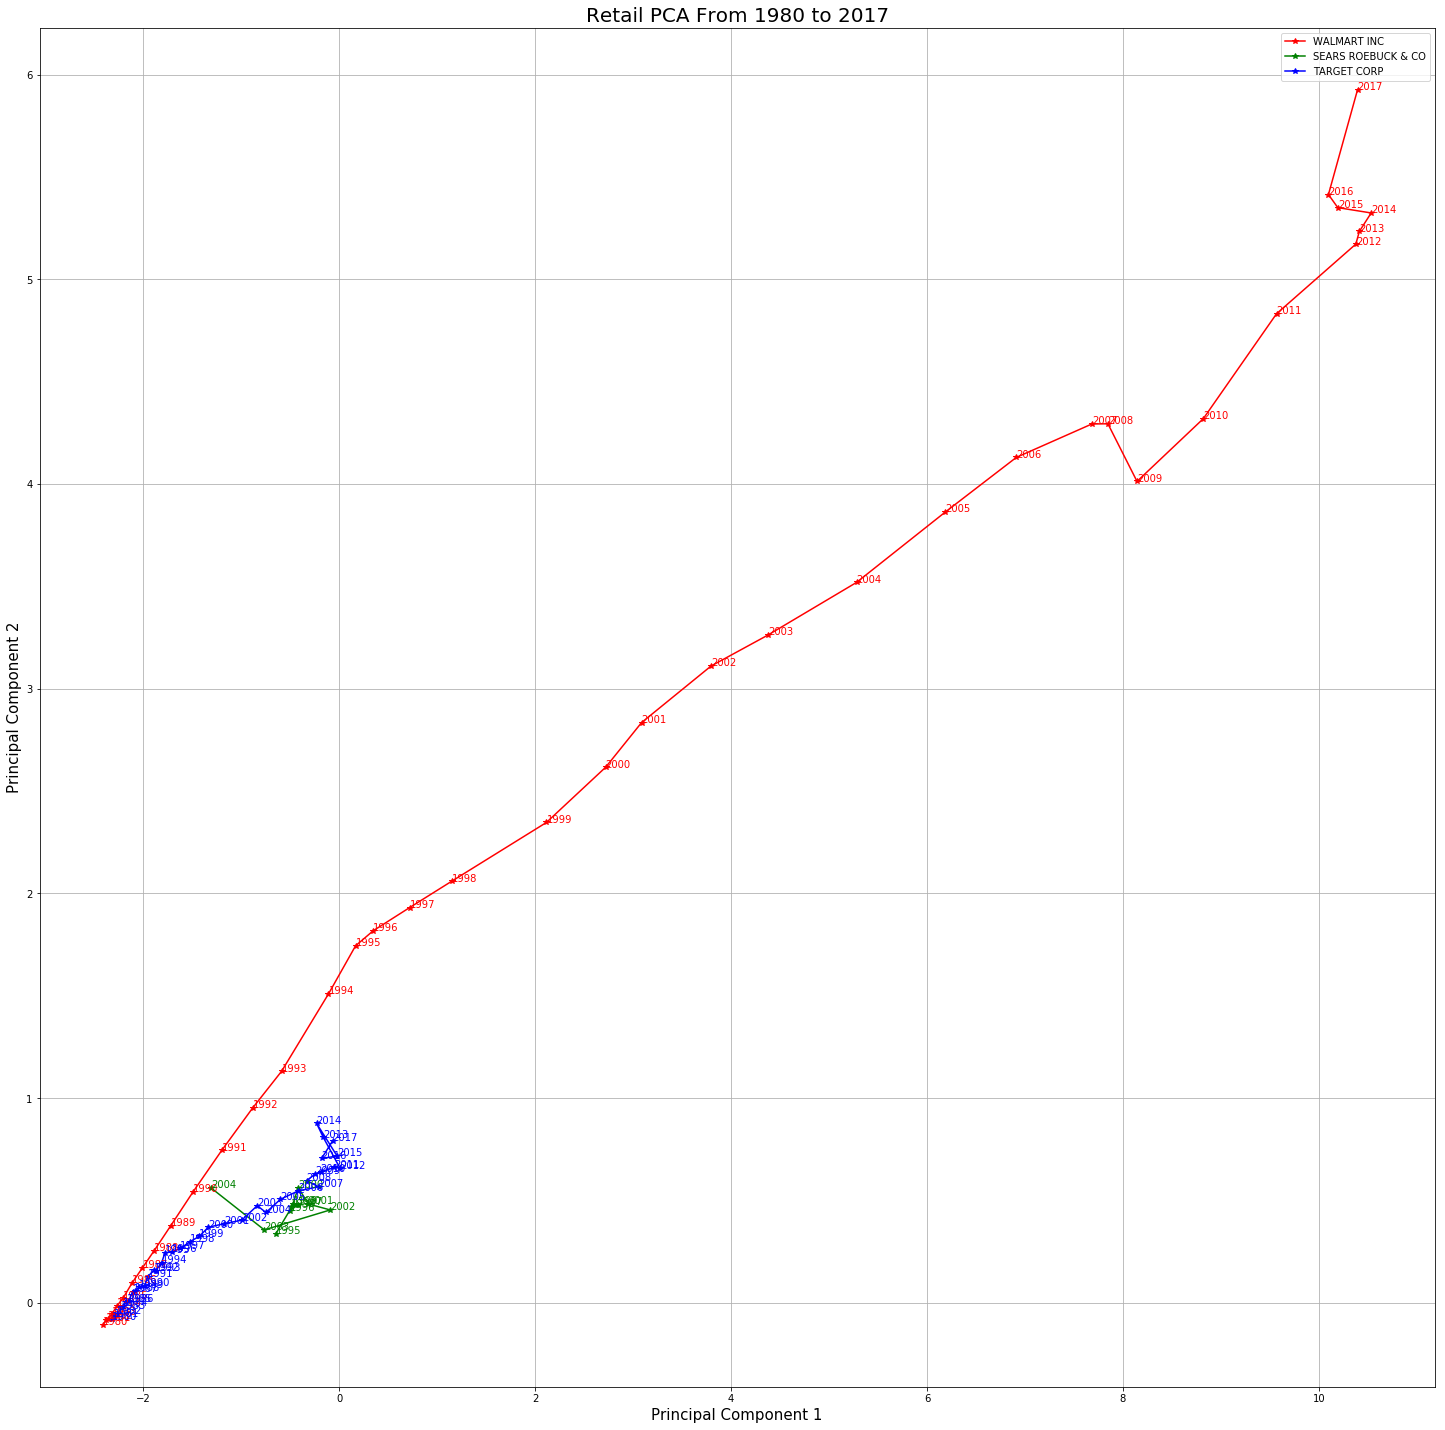

In [223]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Retail PCA From 1980 to 2017', fontsize = 20)
CompanyList = Retail
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Conglomerate plot

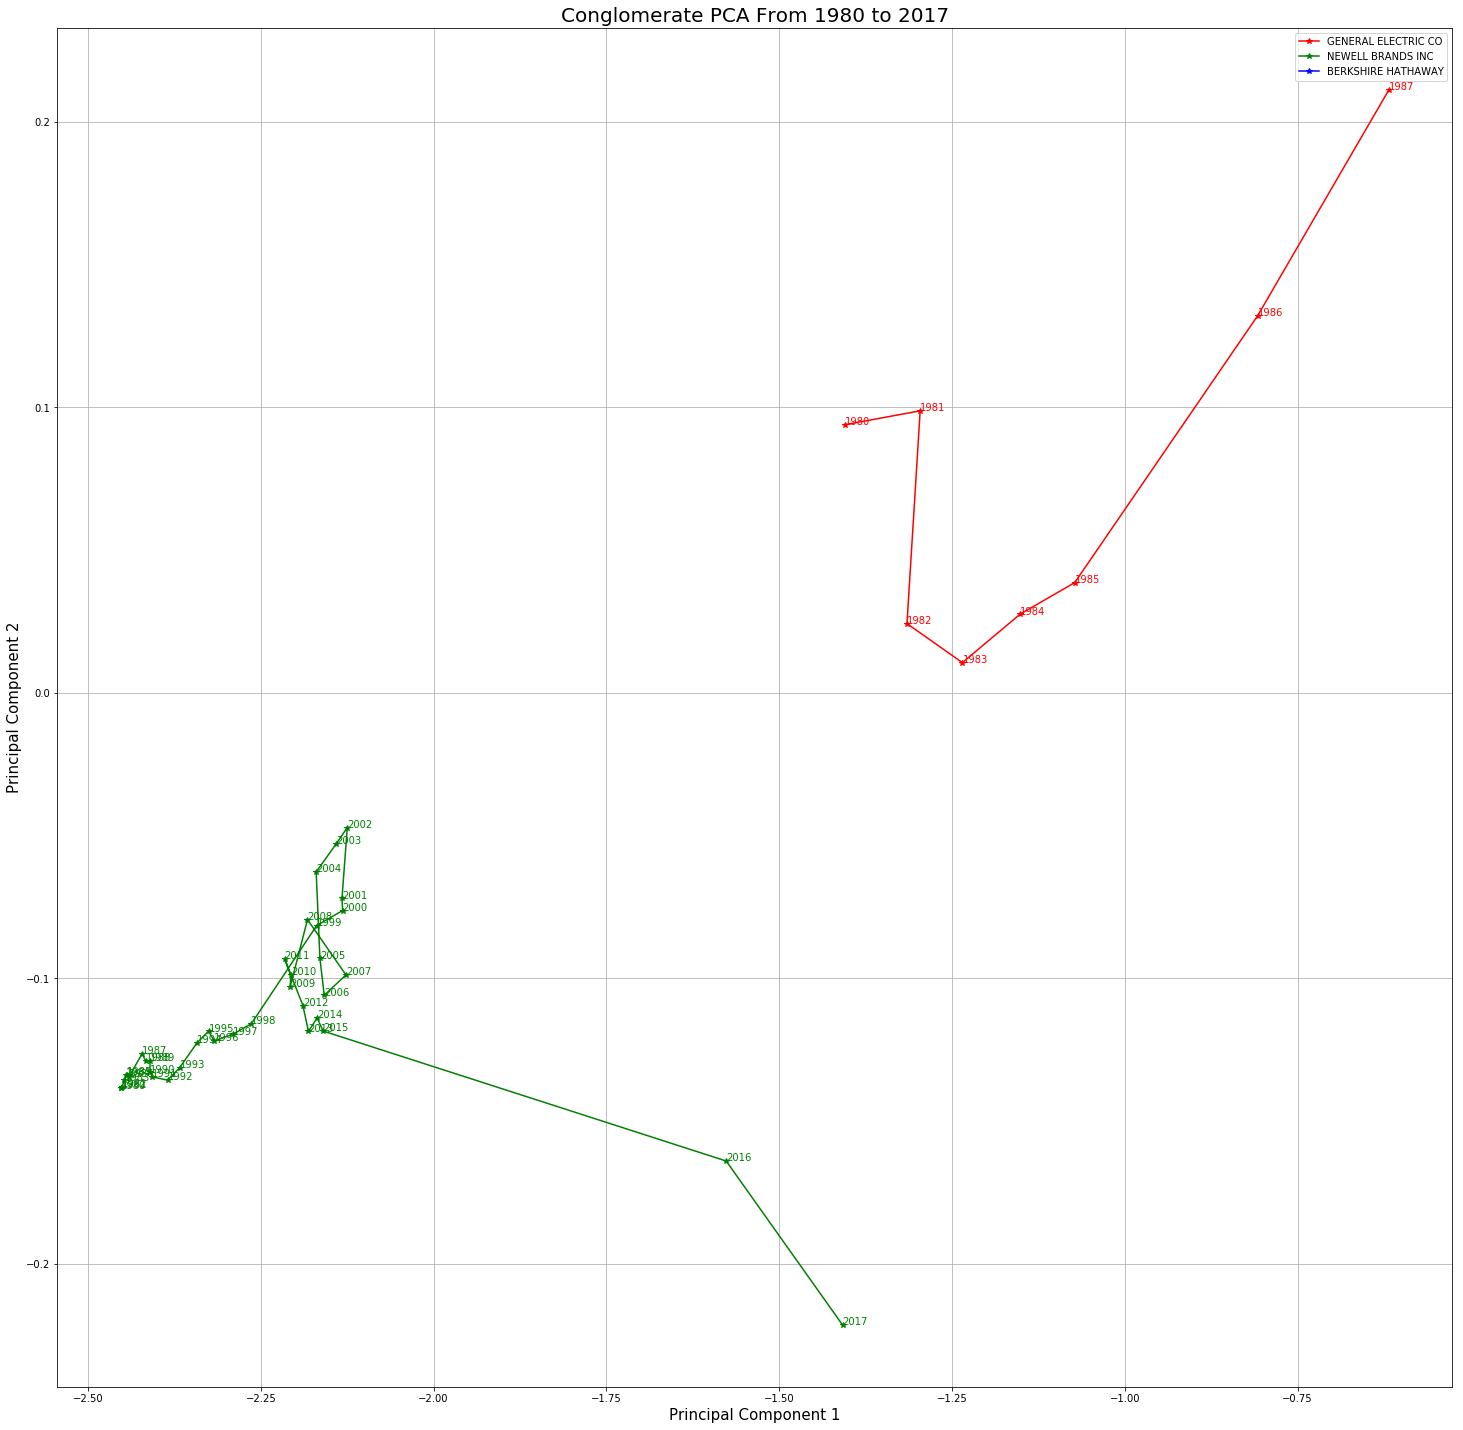

In [315]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate PCA From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

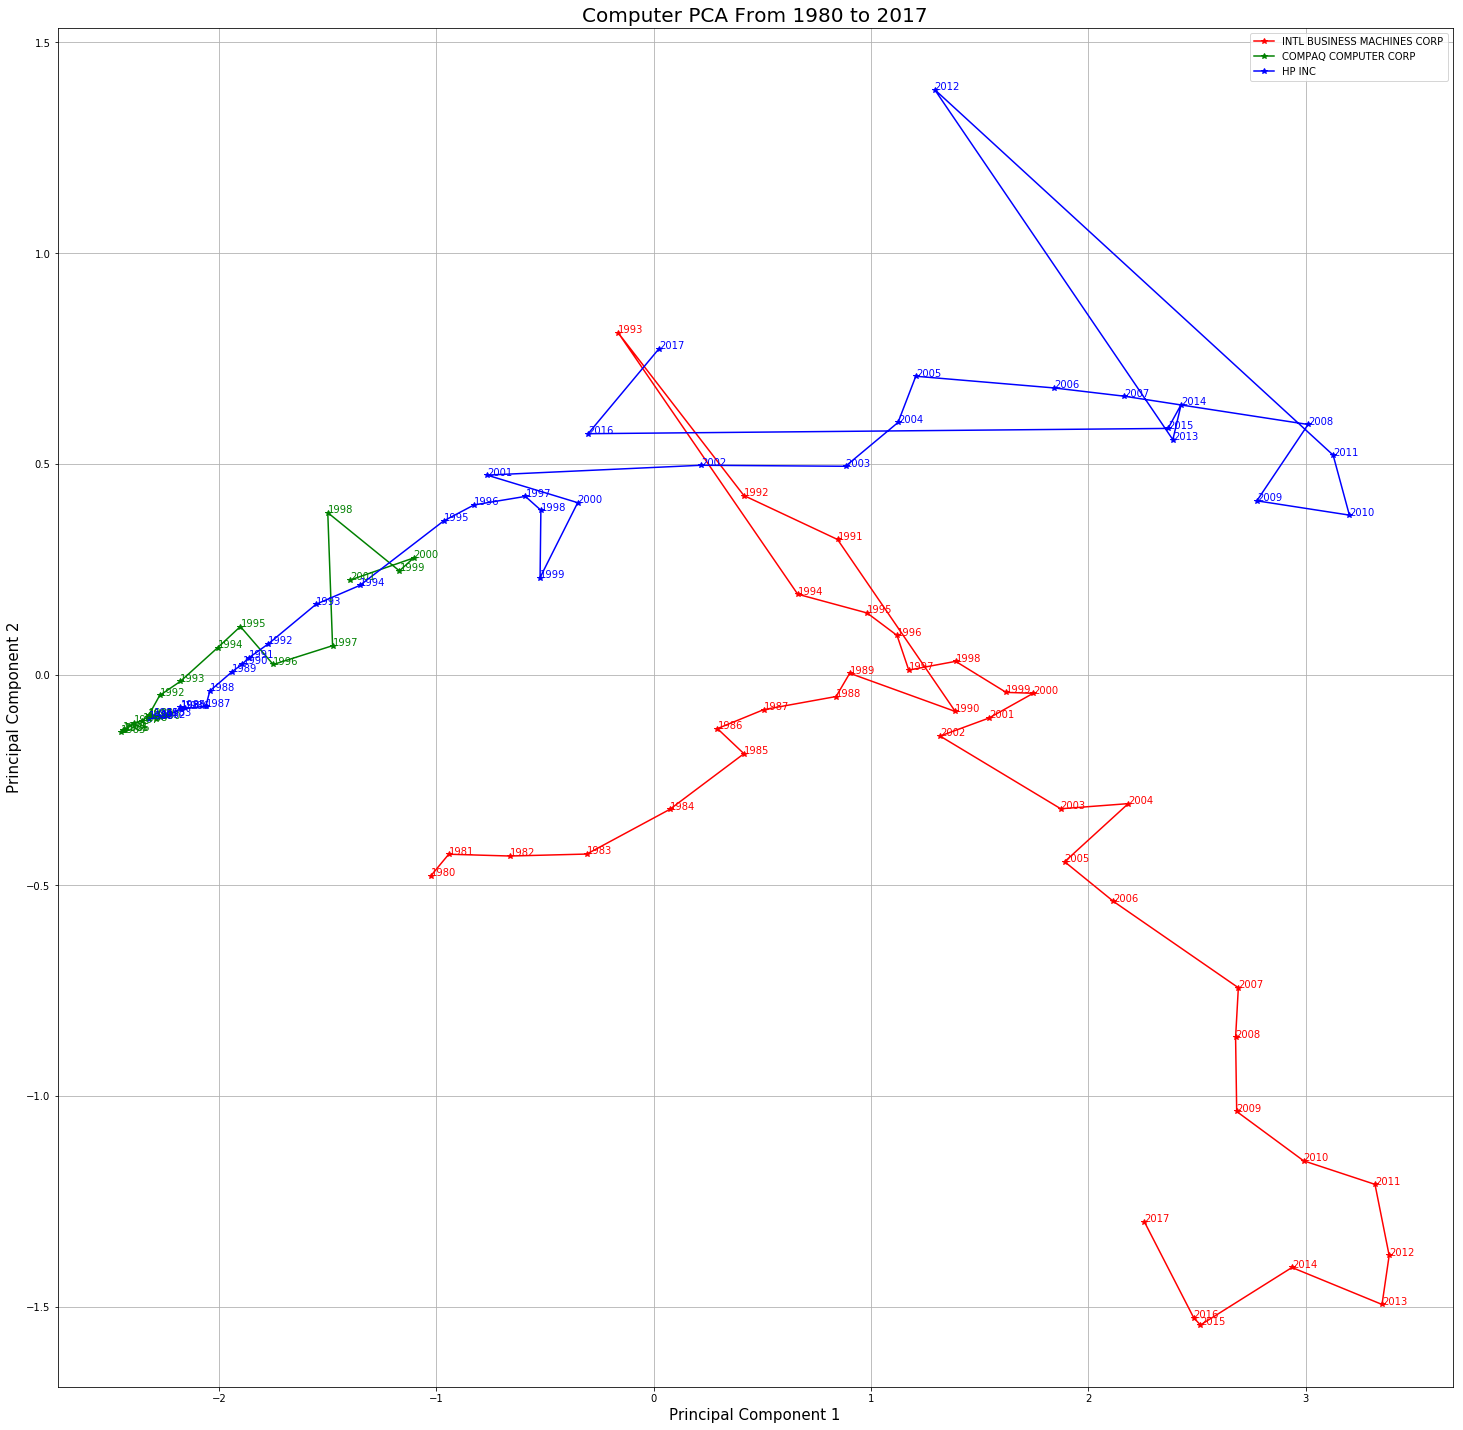

In [227]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer PCA From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## t-Distributed Stochastic Neighbouring Entities (t-SNE) Absolute values

In [261]:
# Separating out the features
x2 = DBfrom1980to2017nonans.loc[:, features].values
# Standardizing the features
x2 = StandardScaler().fit_transform(x2)



In [262]:
X_embedded = TSNE(n_components=2).fit_transform(x2)
X_embedded

array([[  1.2401695 ,  19.860697  ],
       [  0.8531265 ,  19.64935   ],
       [  0.23098646,  19.55633   ],
       ...,
       [-28.532364  , -29.870834  ],
       [-28.269705  , -30.171915  ],
       [-28.848394  , -30.273499  ]], dtype=float32)

In [263]:
tSNEDF= pd.DataFrame (data=X_embedded, columns= ['Principal Component 1', 'Principal Component 2'])
tSNEDF.head()



Principal Component 1  Principal Component 2
0               1.240170              19.860697
1               0.853127              19.649349
2               0.230986              19.556330
3               0.276845              19.217964
4              -0.601178              19.168295

In [264]:
tsNEDF_Final= pd.concat([tSNEDF,DB_TA_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
tsNEDF_Final.head()

Principal Component 1  Principal Component 2                    conm  \
261              15.201212               5.155329     GENERAL ELECTRIC CO   
34               -3.887273               7.510339      BERKSHIRE HATHAWAY   
375              22.469942               7.198983          HOME DEPOT INC   
337               7.833363              -3.445206                  HP INC   
527              21.748882              11.646696  MOTOROLA SOLUTIONS INC   

      fyear  
261  1980.0  
34   1980.0  
375  1980.0  
337  1980.0  
527  1980.0

## oil Plot

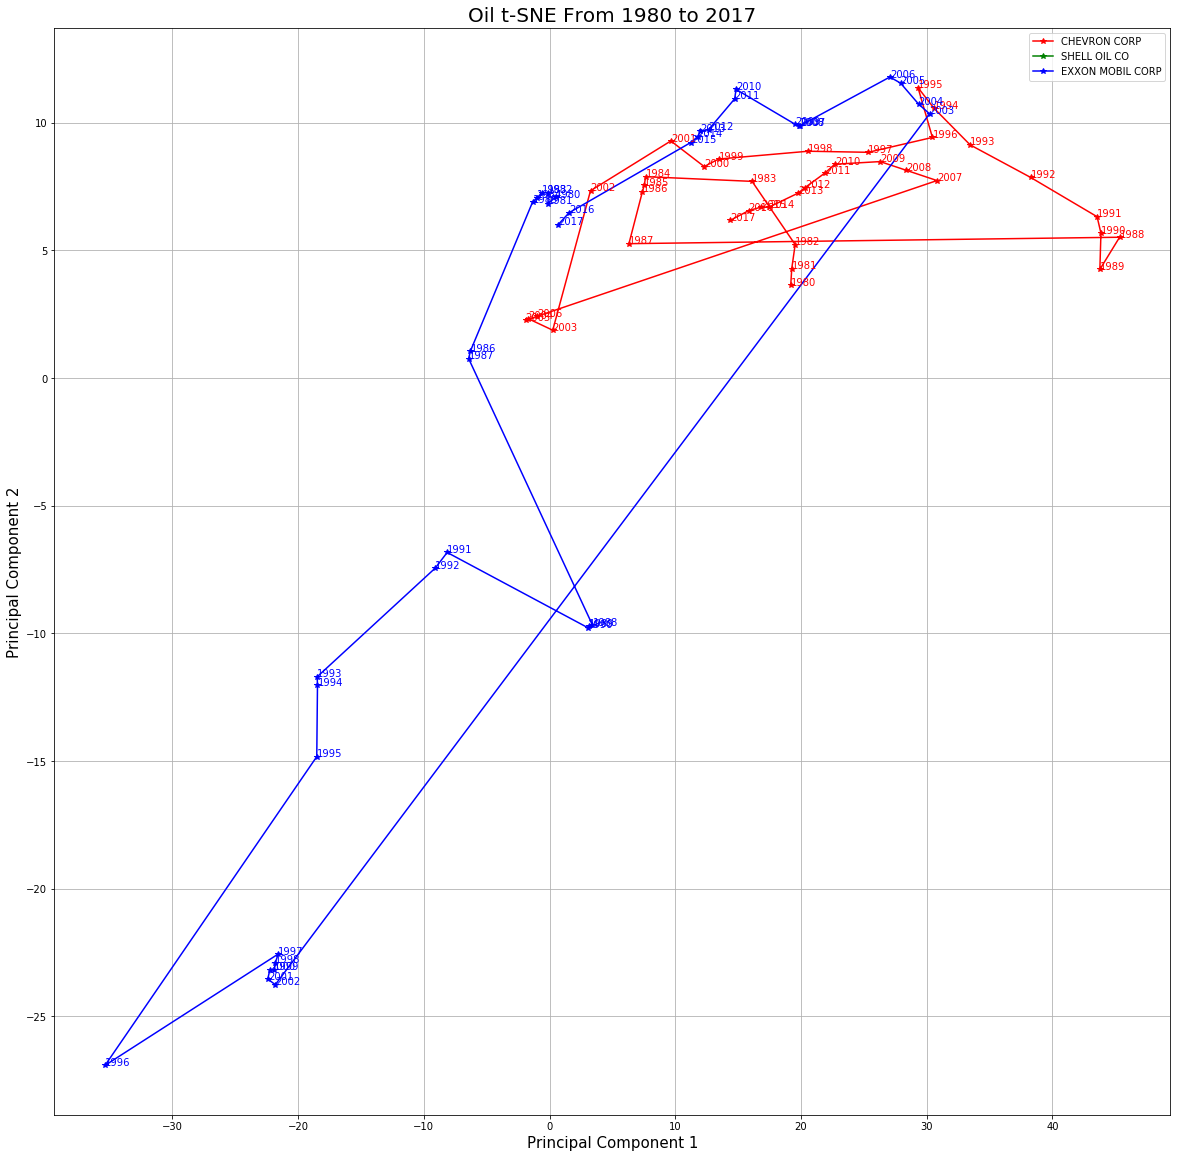

In [271]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

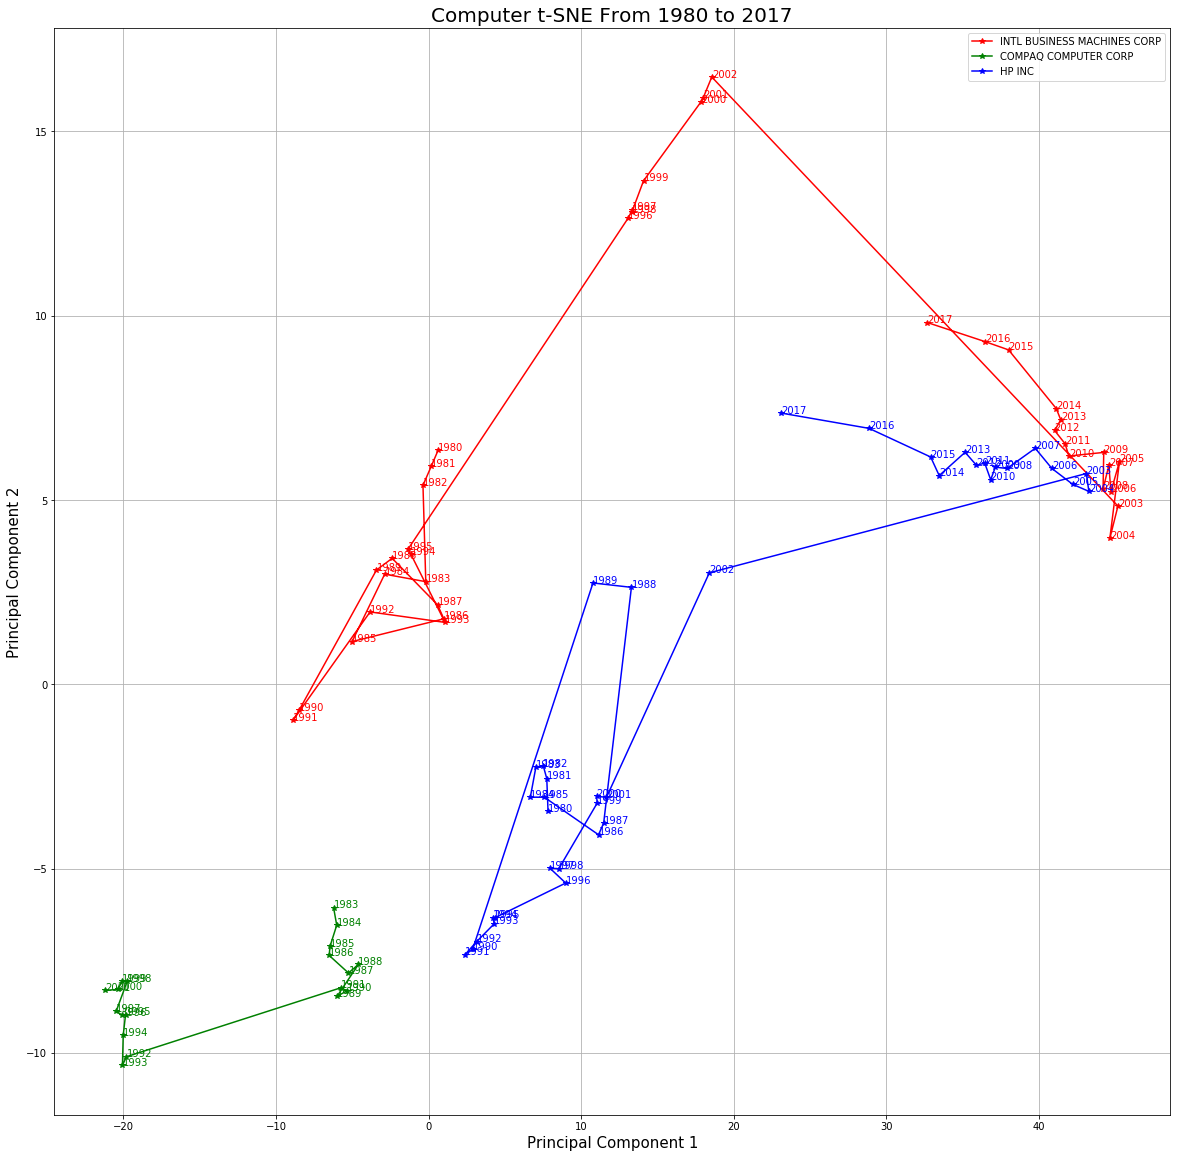

In [278]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

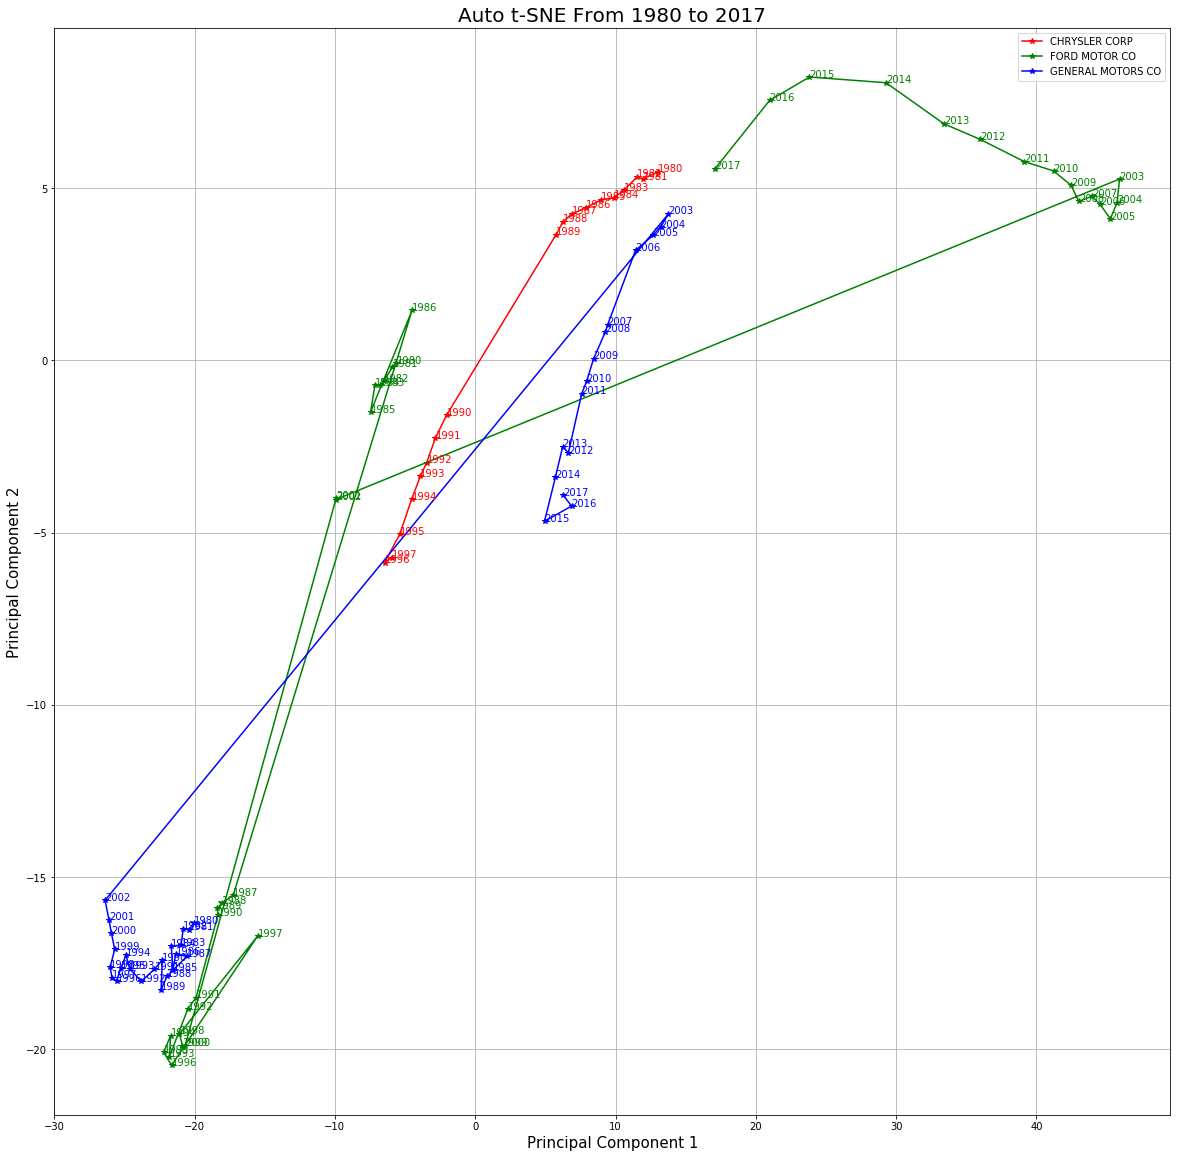

In [316]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Conglomerate

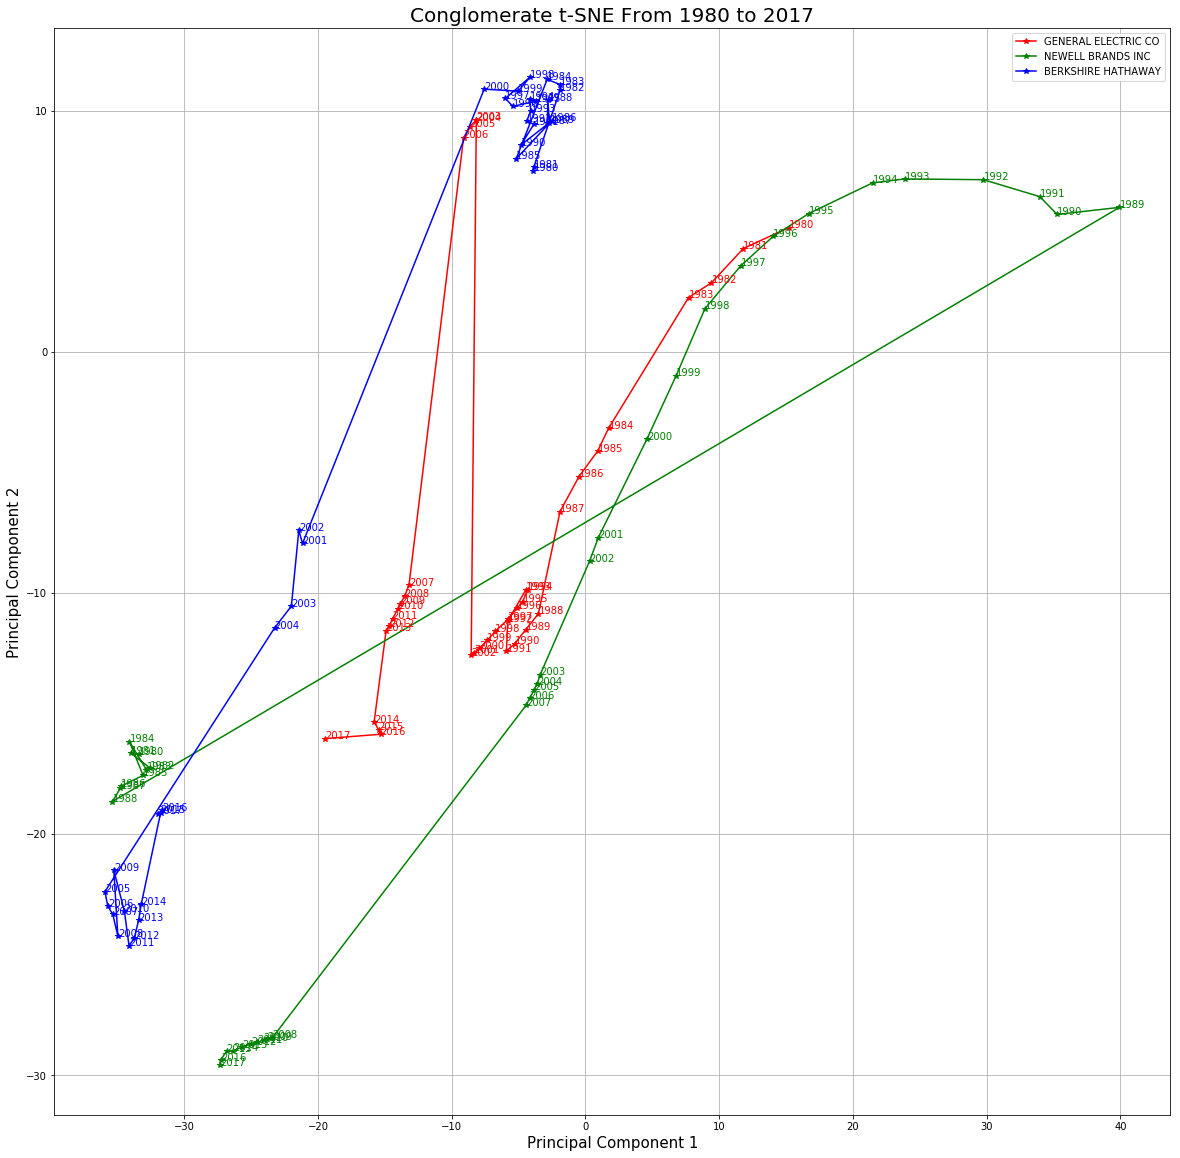

In [282]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

In [286]:
#Hardware

In [291]:
# fig = plt.figure(figsize = (20,20))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('Hardware t-SNE From 1980 to 2017', fontsize = 20)
# CompanyList = Hardware
# colors = ['r','g','b']
# for company, color in zip(CompanyList,colors):
#     indicesToKeep = DB_TA_Ratio['conm'] == company
#     plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
#                , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
#                , '-*'
#                , c = color)
#     for ttxt in zip(
#             tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
#             tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
#             [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
#         plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
# ax.legend(CompanyList)
# ax.grid()

1. AT -- Assets 
2. Total BKVLPS 
3. Book Value Per Share
4. COGS -- Cost of Goods Sold 
5. DVT -- Dividends - Total
6. IB -- Income Before Extraordinary Items 
7. LT -- Liabilities - Total
8. NI -- Net Income (Loss) 
9. REVT -- Revenue - Total SALE -- Sales/Turnover (Net)
10. SEQ -- Stockholders' Equity - Total
11. ACT -- Current Assets
12. Ap -- Account Payable
13. ARTFS --- Account receivable*
14. invt -- Inventory
15. lct -- Current Liabilities

## Ratios: Combination of different ratios

In [290]:
DB_Ratio=DBfrom1980to2017nonans
DB_Ratio 
DB_Ratio['CR']=DB_Ratio['act']/DB_Ratio['lct']   #Current ratio
DB_Ratio['QR']=(DB_Ratio['act'] - DB_Ratio['invt']) /DB_Ratio['lct'] #Quick ratio
DB_Ratio['DT']=DB_Ratio['lt']/DB_Ratio['at']   #Debt ratio
DB_Ratio['DE']=DB_Ratio['lt']/DB_Ratio['seq']  #Debt to Equity
DB_Ratio['GM']=(DB_Ratio['revt'] - DB_Ratio['cogs'])/DB_Ratio['revt']   #Gross Margin
DB_Ratio['NPM']=DB_Ratio['ni']/DB_Ratio['revt']  #Net Profit Margin
DB_Ratio['RA']=DB_Ratio['ni']/DB_Ratio['at']  #return on Asset
DB_Ratio['RE']=DB_Ratio['ni']/DB_Ratio['seq'] # Return on Equity

DB_Ratio.head()

gvkey   fyear                        conm       act      ap   invt  \
0  002136  1984.0  VERIZON COMMUNICATIONS INC  2600.400  1290.7  121.8   
1  002136  1985.0  VERIZON COMMUNICATIONS INC  2683.699  1227.1  242.3   
2  002136  1986.0  VERIZON COMMUNICATIONS INC  2755.600  1292.2  270.9   
3  002136  1987.0  VERIZON COMMUNICATIONS INC  2796.600  1523.6  298.6   
4  002136  1988.0  VERIZON COMMUNICATIONS INC  3206.400  1622.3  316.5   

        lct      ebit         at   bkvlps    ...          revt       seq  \
0  2741.200  2114.780  18684.203  75.3744    ...      8090.051  7508.499   
1  2831.899  2331.899  19788.305  79.3134    ...      9084.145  7921.270   
2  3593.800  2470.901  21090.805  41.8186    ...      9920.797  8320.697   
3  3183.800  2357.000  21245.100  44.1303    ...     10298.400  8741.900   
4  4265.200  2406.600  24729.200  46.5787    ...     10880.100  9176.700   

         CR        QR        DT        DE        GM       NPM        RA  \
0  0.948636  0.904203  0.598142  1.488420  0.408981  0.120284  0.052081   
1  0.947668  0.862107  0.599702  1.498130  0.417838  0.120309  0.055230   
2  0.766765  0.691385  0.605486  1.534751  0.437898  0.117642  0.055337   
3  0.878384  0.784597  0.588522  1.430261  0.430902  0.120446  0.058385   
4  0.751758  0.677553  0.628912  1.694781  0.437551  0.121028  0.053249   

         RE  
0  0.129600  
1  0.137970  
2  0.140265  
3  0.141891  
4  0.143494  

[5 rows x 25 columns]

## 1. PCA

In [292]:
features1 = ['CR', 'QR', 'DT', 'DE','GM','NPM','RA','RE']
# Separating out the features
x3 = DB_Ratio.loc[:, features1].values
# Standardizing the features
x3 = StandardScaler().fit_transform(x3)


In [293]:
pca = PCA(n_components=2)
principalcomp1= pca.fit_transform(x3)
principalDF1= pd.DataFrame (data=principalcomp1, columns= ['Principal Component 1', 'Principal Component 2'])
principalDF1.head()



Principal Component 1  Principal Component 2
0               0.664845              -0.412266
1               0.691600              -0.478000
2               0.588707              -0.867057
3               0.717639              -0.620593
4               0.563826              -0.959359

In [294]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.25710791 0.20697212]


In [296]:
FinalDF1= pd.concat([principalDF1,DB_TA_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
FinalDF1.head()



Principal Component 1  Principal Component 2                    conm  \
261               0.315313               0.342011     GENERAL ELECTRIC CO   
34                0.441485               0.635690      BERKSHIRE HATHAWAY   
375              -0.600825              -0.200837          HOME DEPOT INC   
337              -2.090621               1.313055                  HP INC   
527               0.657050              -0.457592  MOTOROLA SOLUTIONS INC   

      fyear  
261  1980.0  
34   1980.0  
375  1980.0  
337  1980.0  
527  1980.0

## Oil Plot

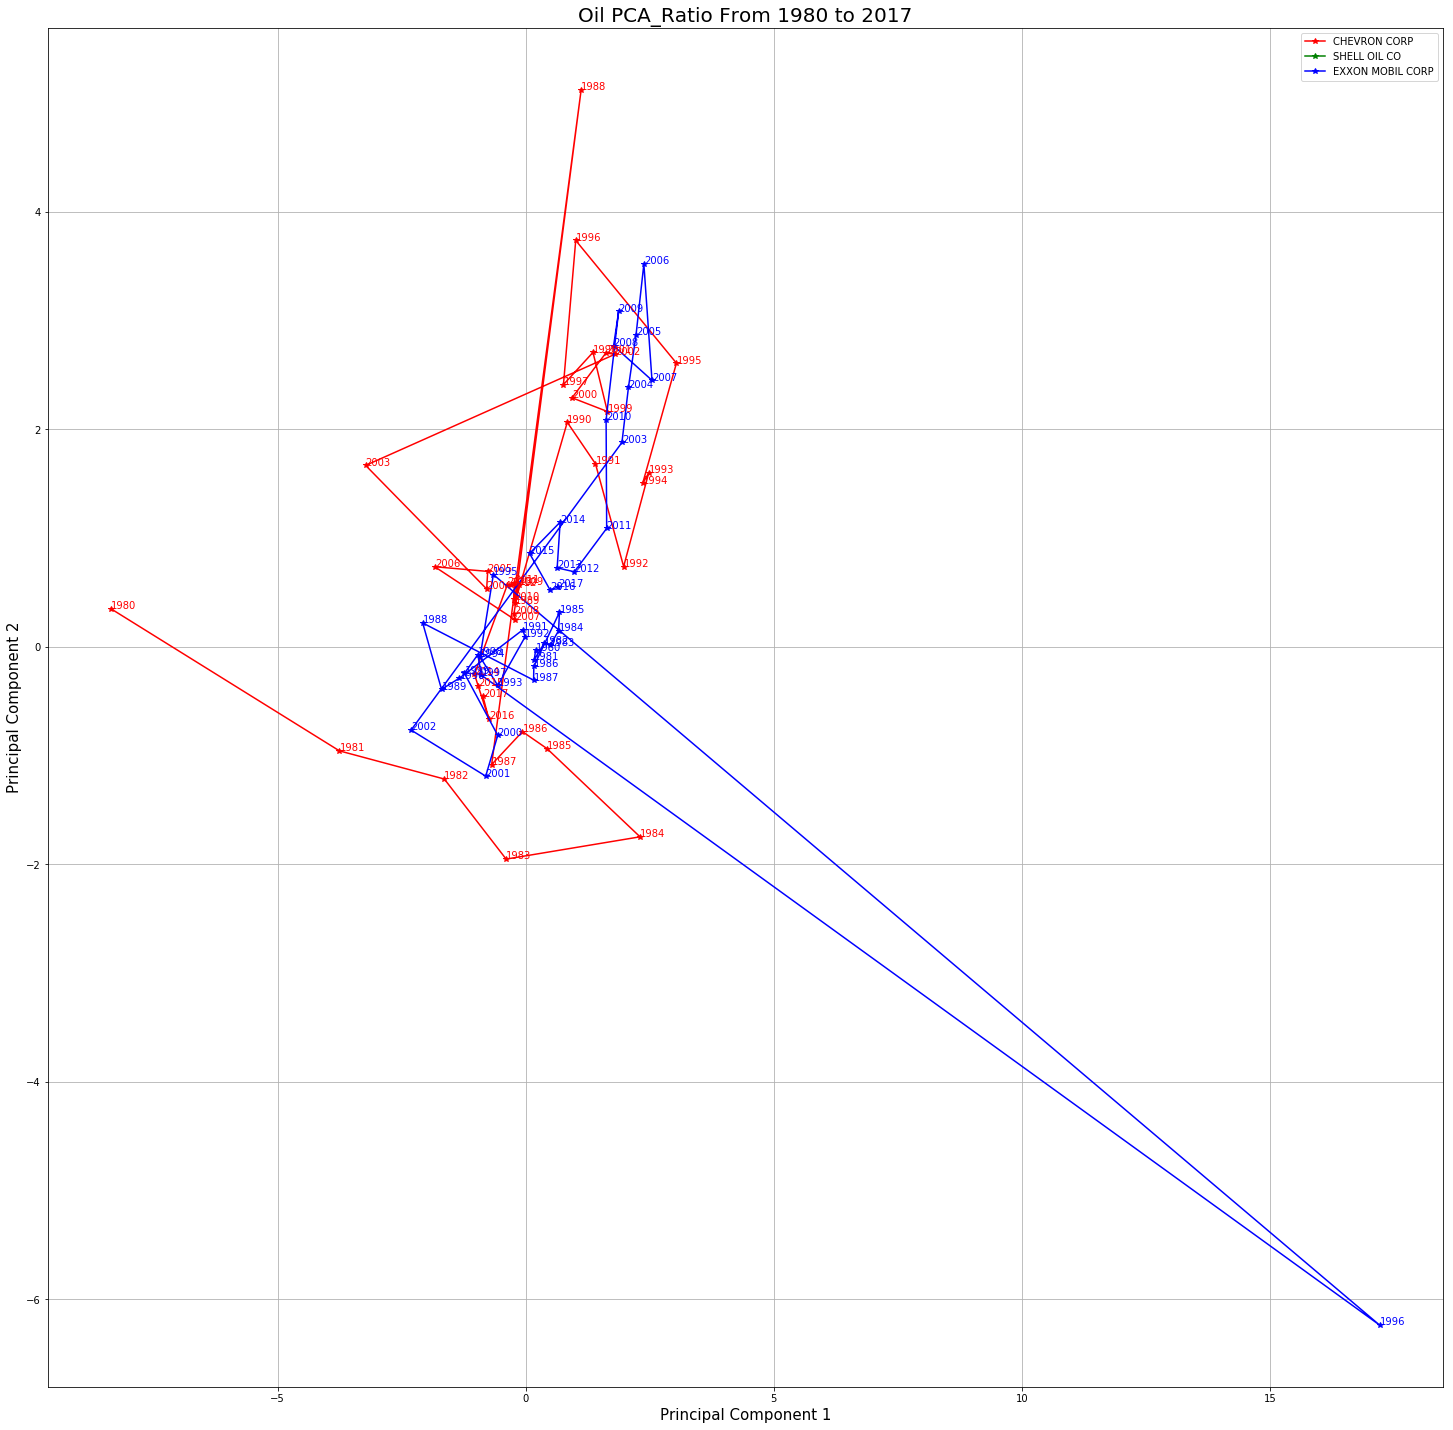

In [297]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

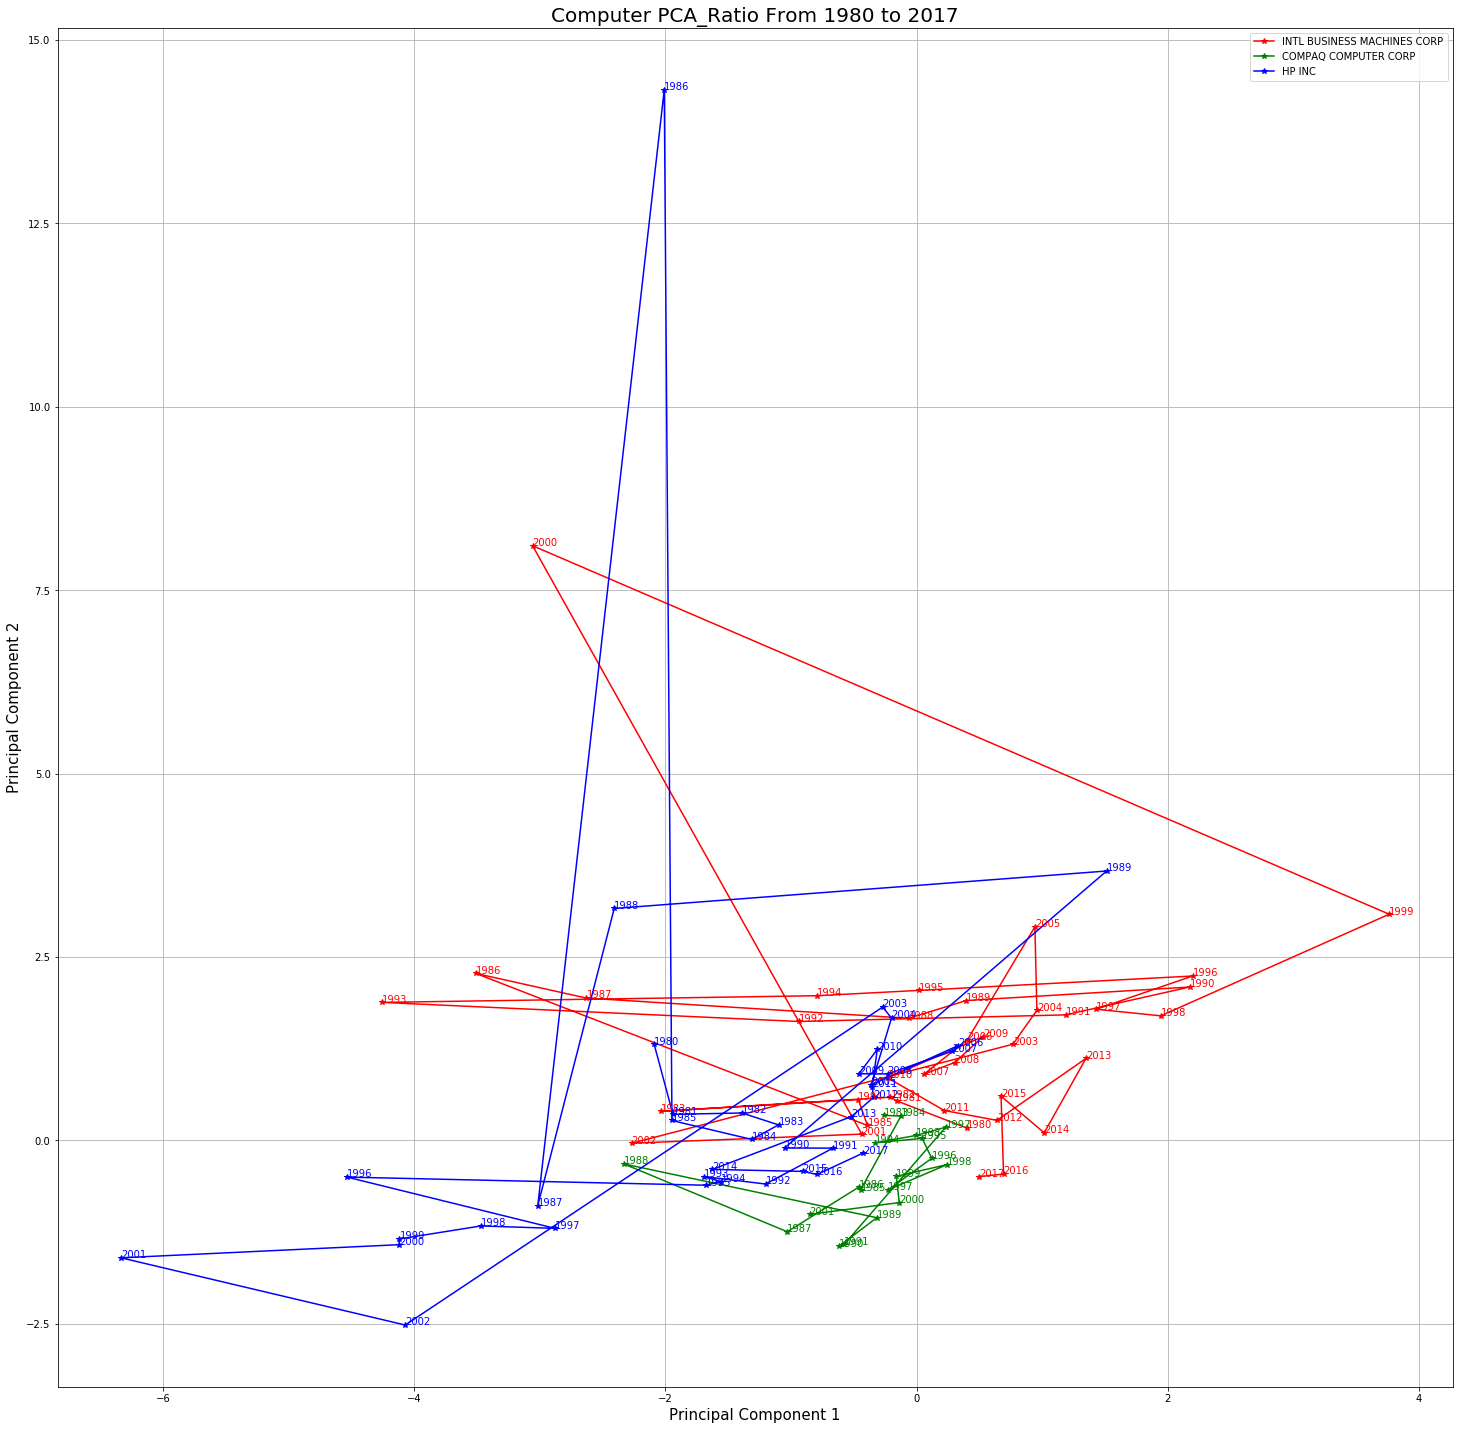

In [299]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

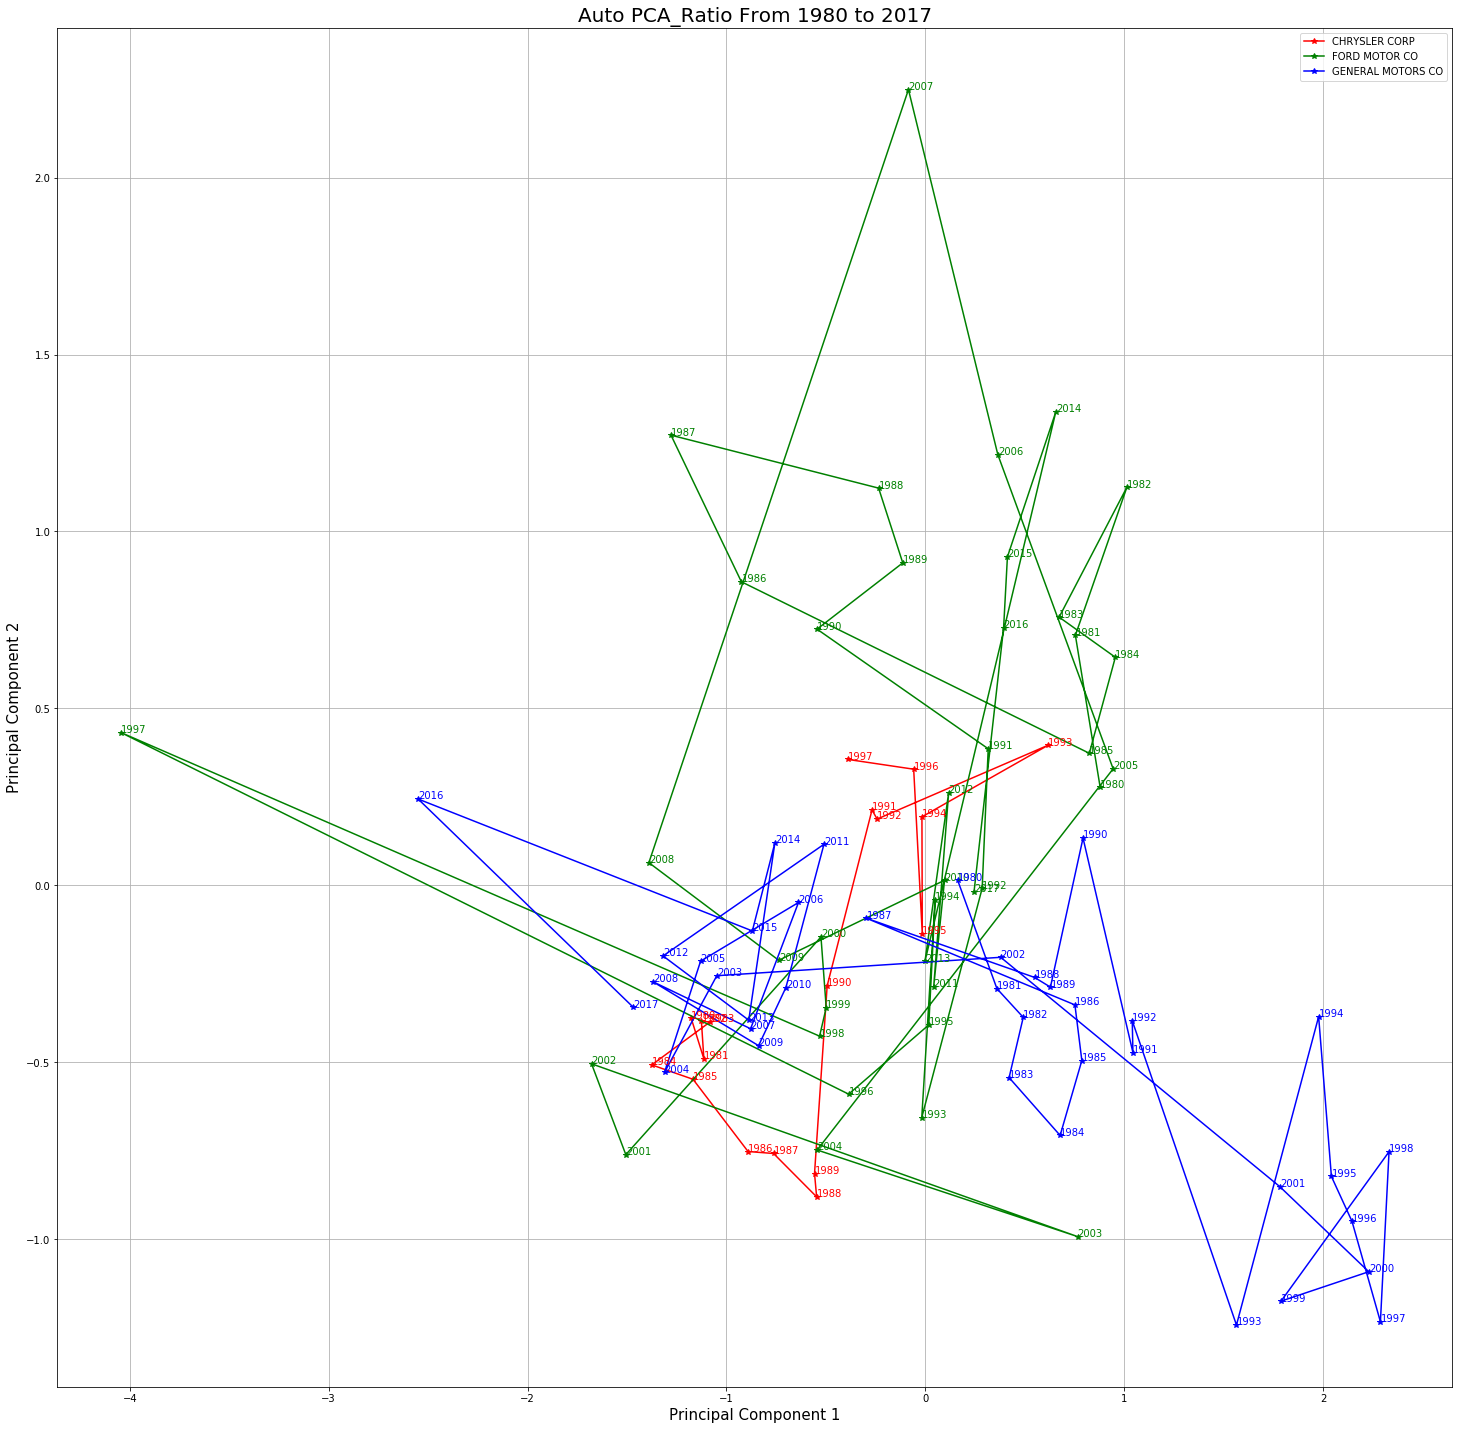

In [300]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Conglomerate Plot

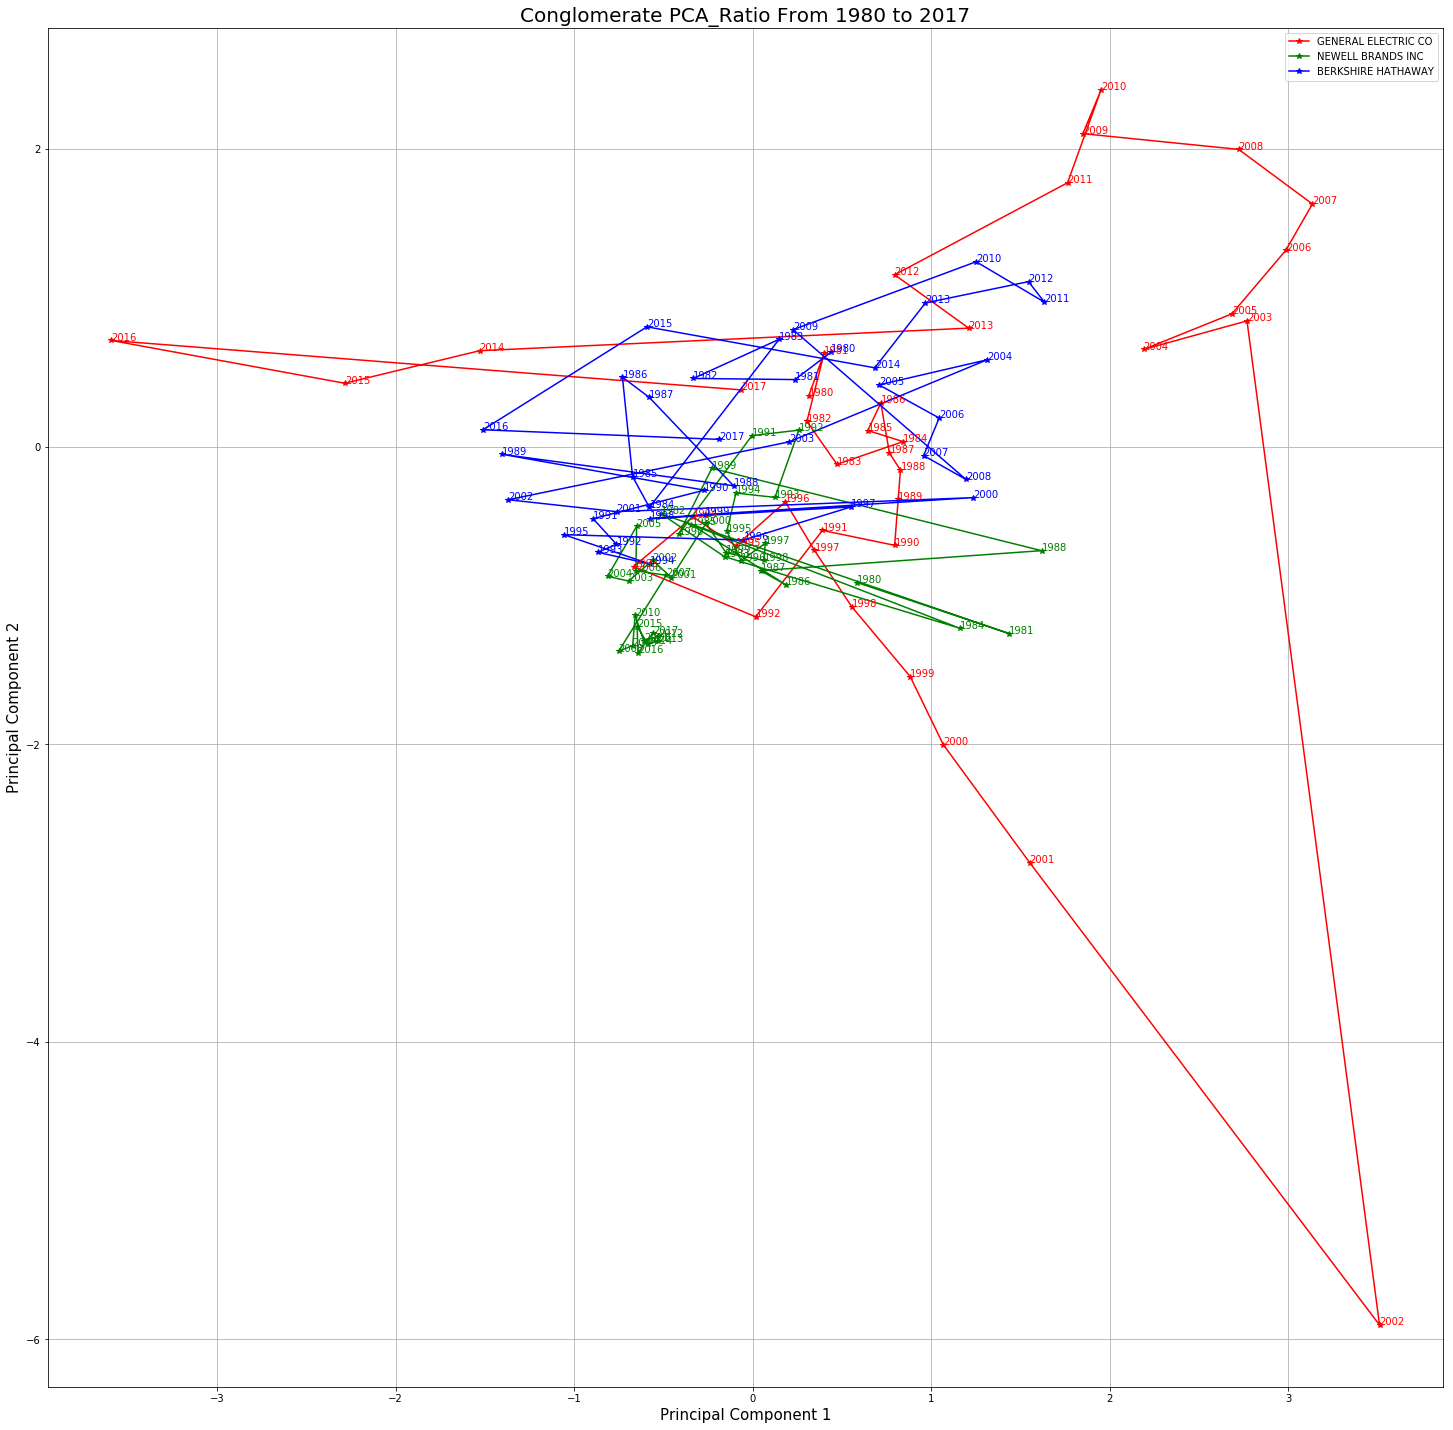

In [301]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## 2. t-Distributed Stochastic Neighbouring Entities (t-SNE) 

In [302]:
features1 = ['CR', 'QR', 'DT', 'DE','GM','NPM','RA','RE']
# Separating out the features
x4 = DB_Ratio.loc[:, features1].values
# Standardizing the features
x4 = StandardScaler().fit_transform(x4)



In [303]:
X_embedded1 = TSNE(n_components=2).fit_transform(x4)
X_embedded1


array([[ 14.4592705, -21.781012 ],
       [ 14.646484 , -22.270283 ],
       [ 14.183521 , -23.687883 ],
       ...,
       [-28.936453 , -10.947723 ],
       [-28.864643 , -11.865535 ],
       [-28.74625  , -13.01955  ]], dtype=float32)

In [304]:
tSNEDF1= pd.DataFrame (data=X_embedded1, columns= ['Principal Component 1', 'Principal Component 2'])
tSNEDF1.head()



Principal Component 1  Principal Component 2
0              14.459270             -21.781012
1              14.646484             -22.270283
2              14.183521             -23.687883
3              14.302726             -22.901159
4              14.639403             -23.881123

In [305]:
tsNEDF_Final1= pd.concat([tSNEDF1,DB_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
tsNEDF_Final1.head()



Principal Component 1  Principal Component 2  \
175             -11.570188               7.915735   
284              22.126312               8.743336   
574             -20.074394              -2.991068   
137               1.675106              20.224302   
34                3.043496              21.713203   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

## Oil Plot

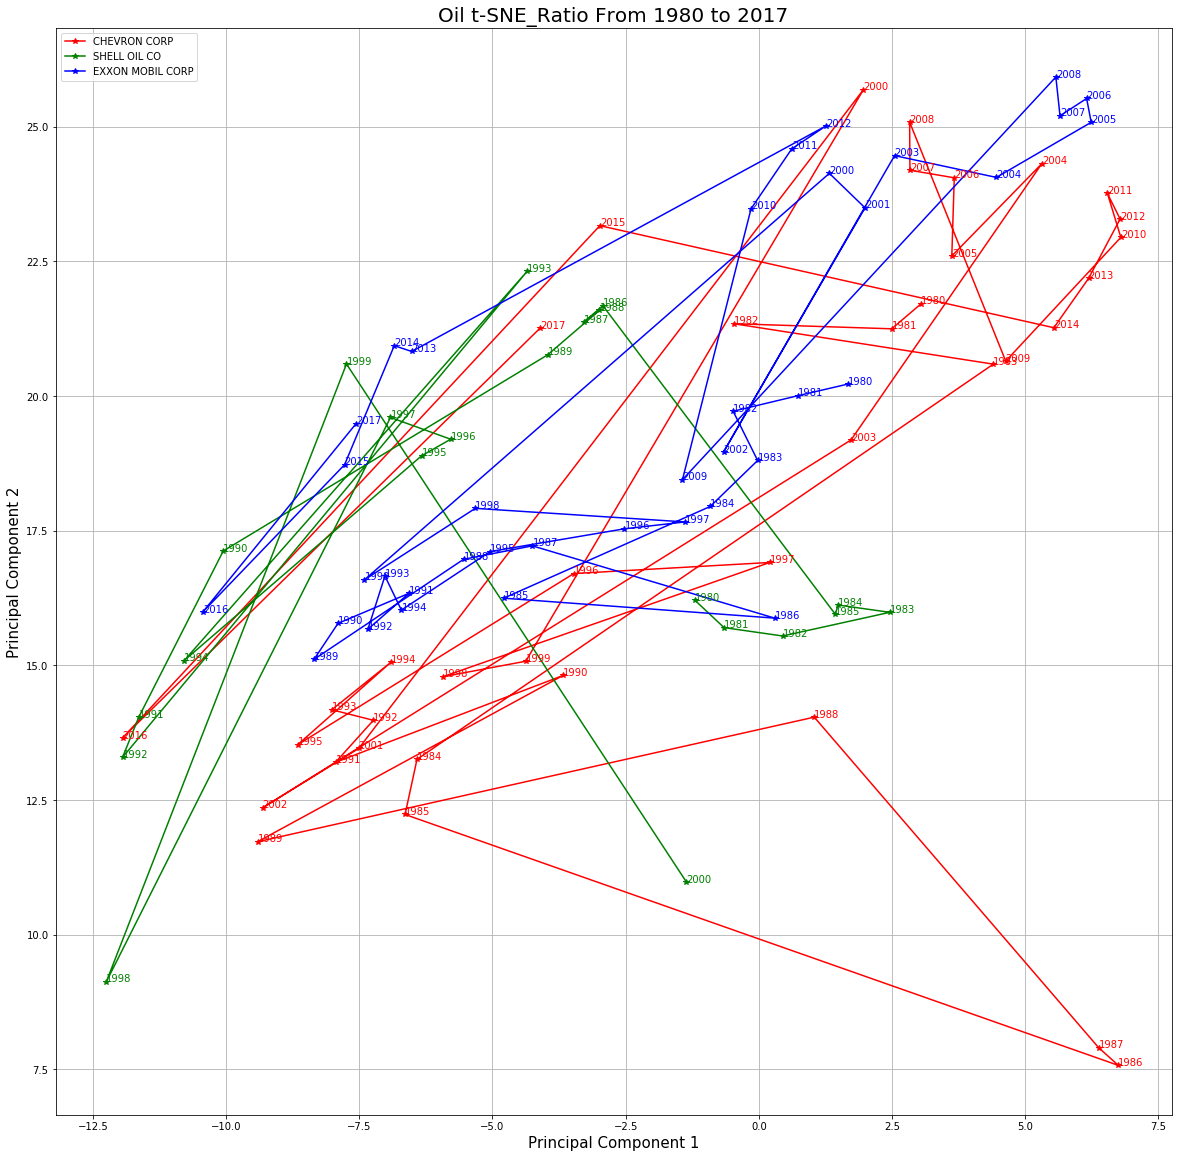

In [306]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

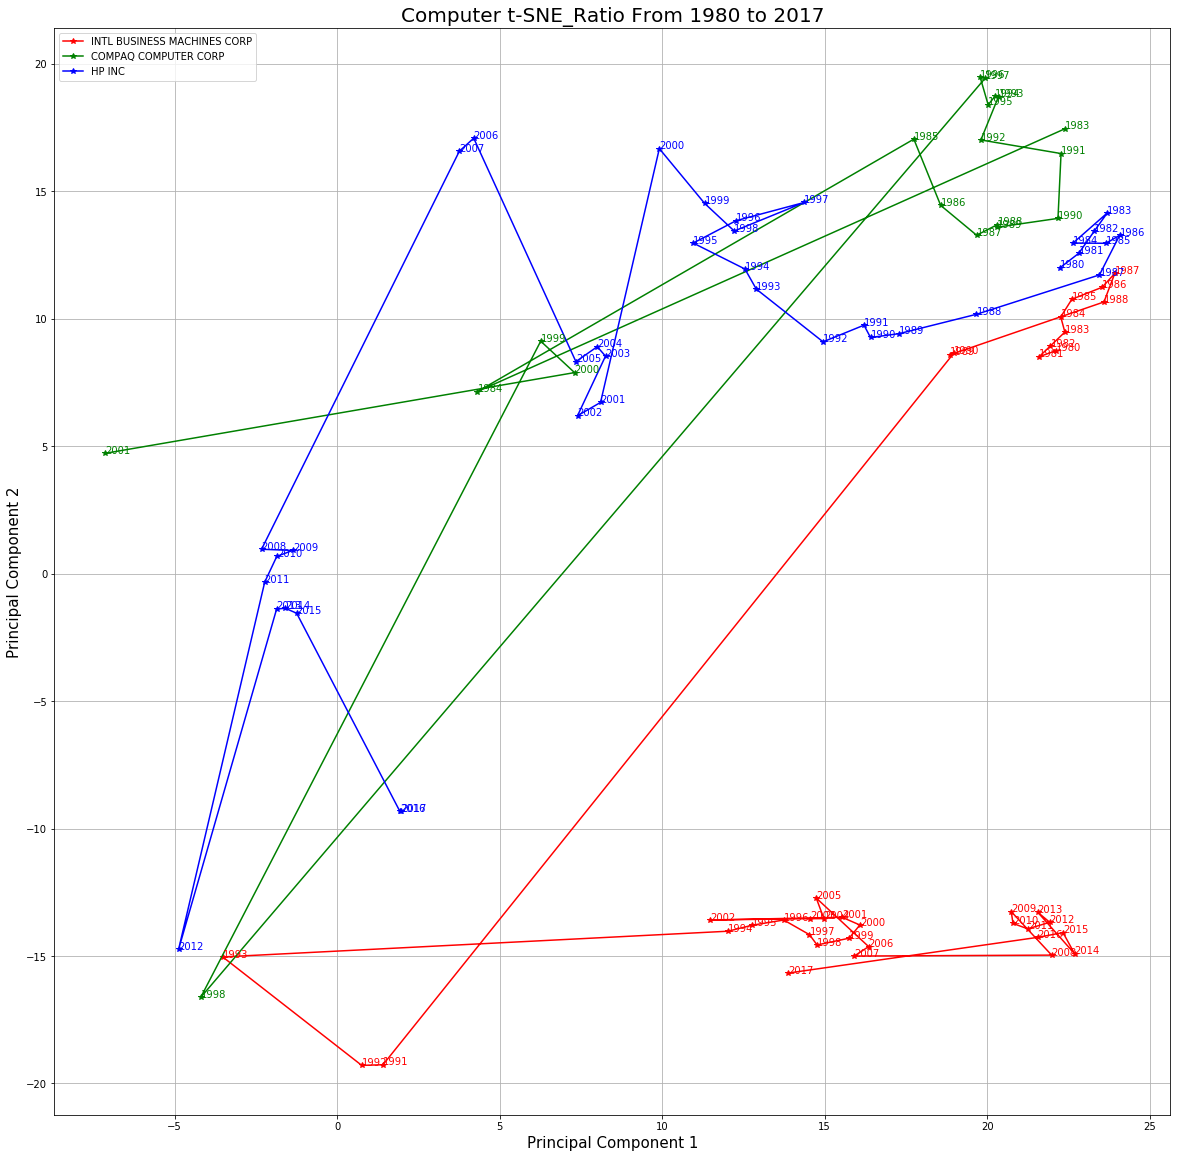

In [307]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

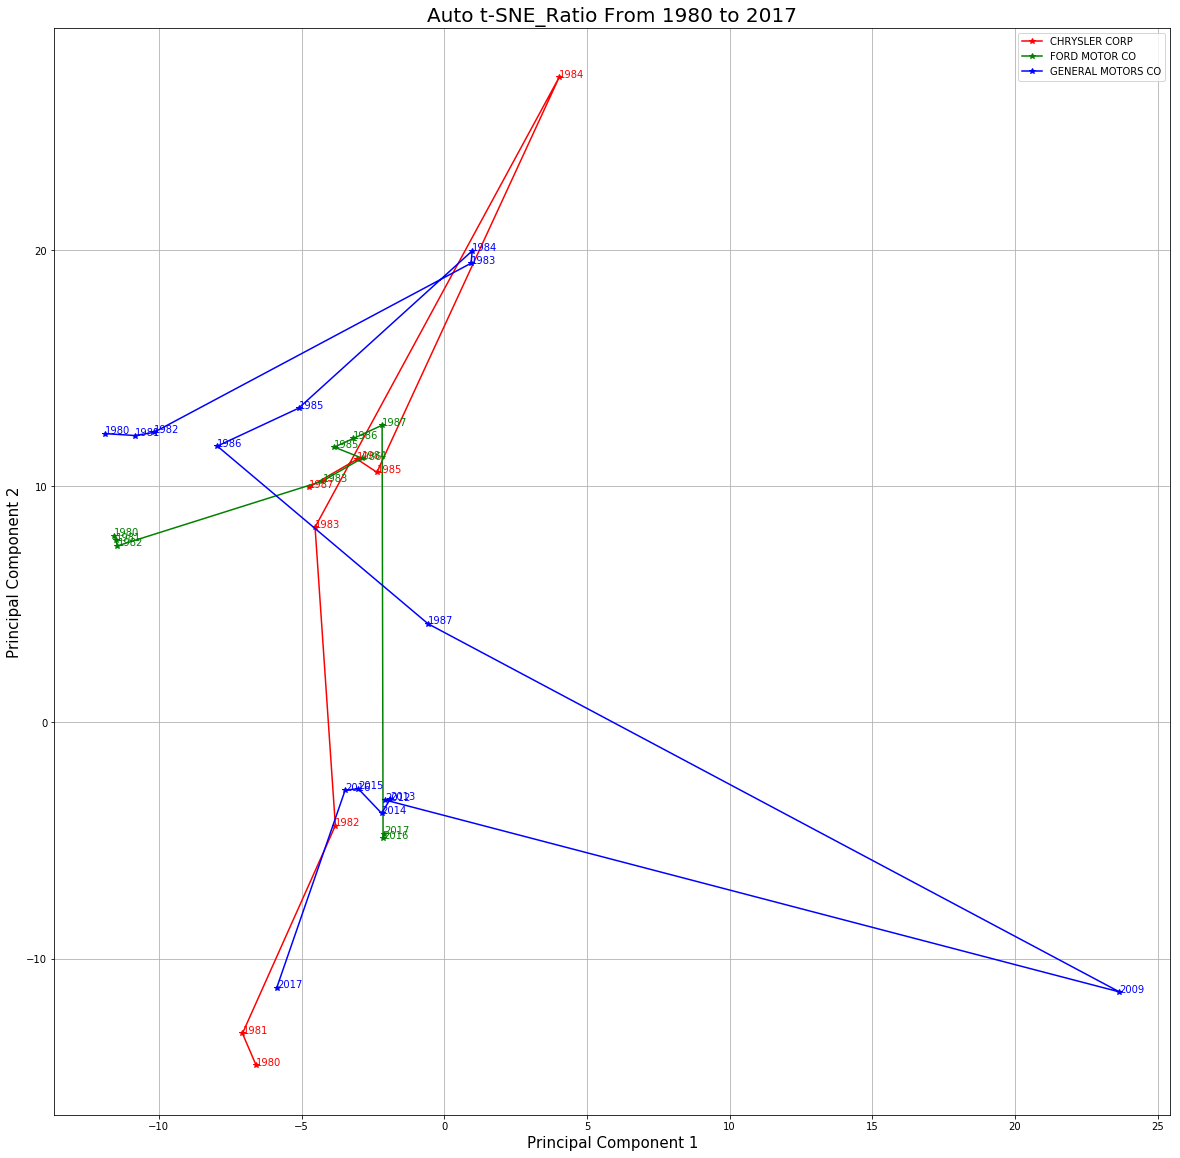

In [308]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

##  Conglomerate Plot

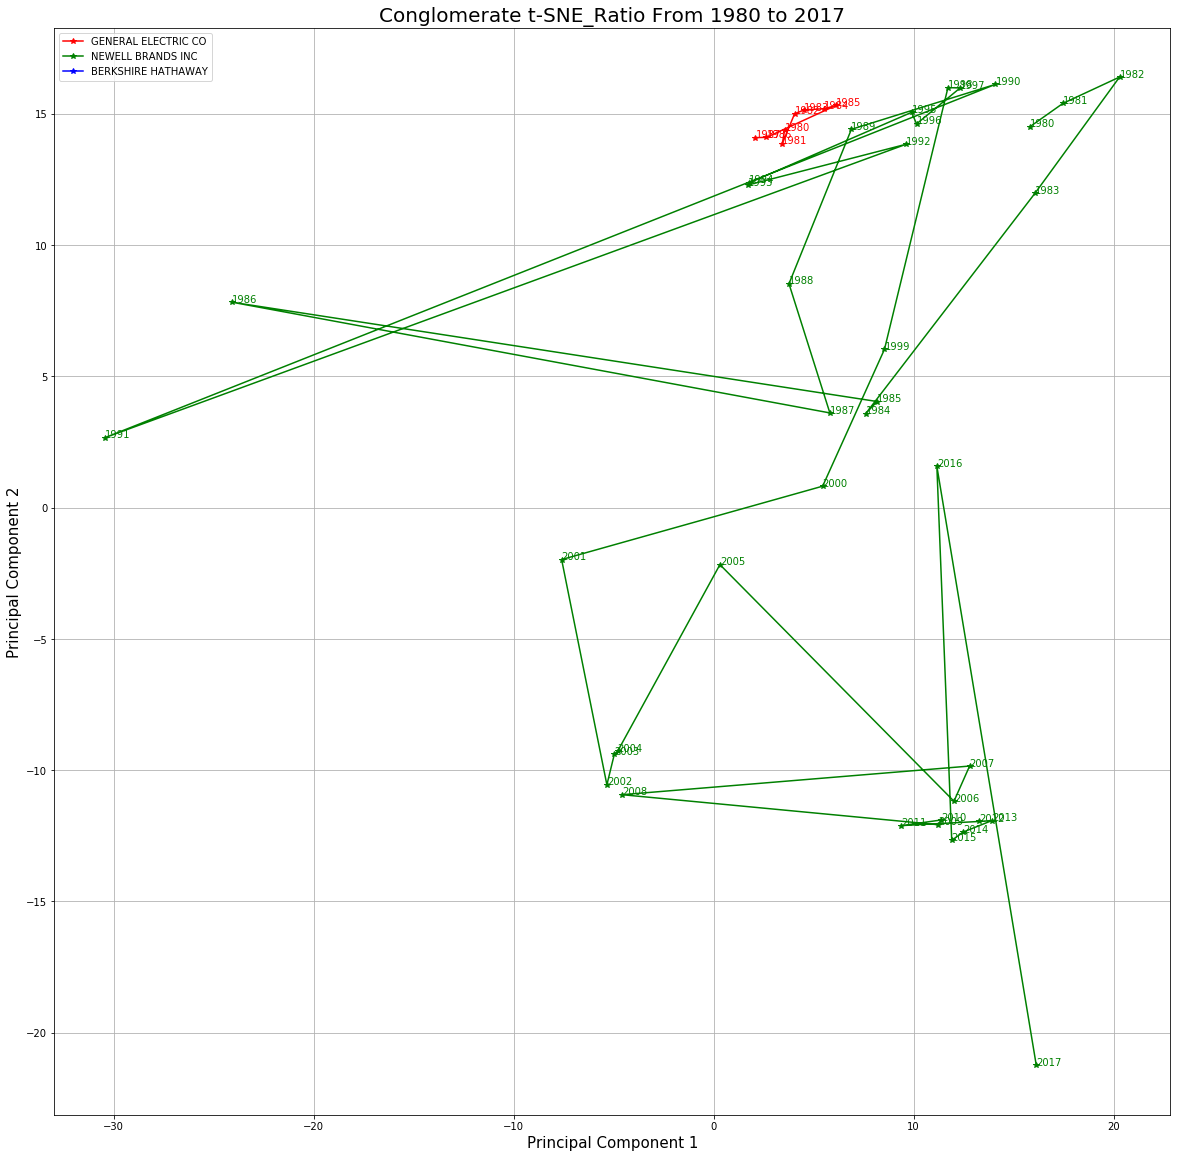

In [309]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

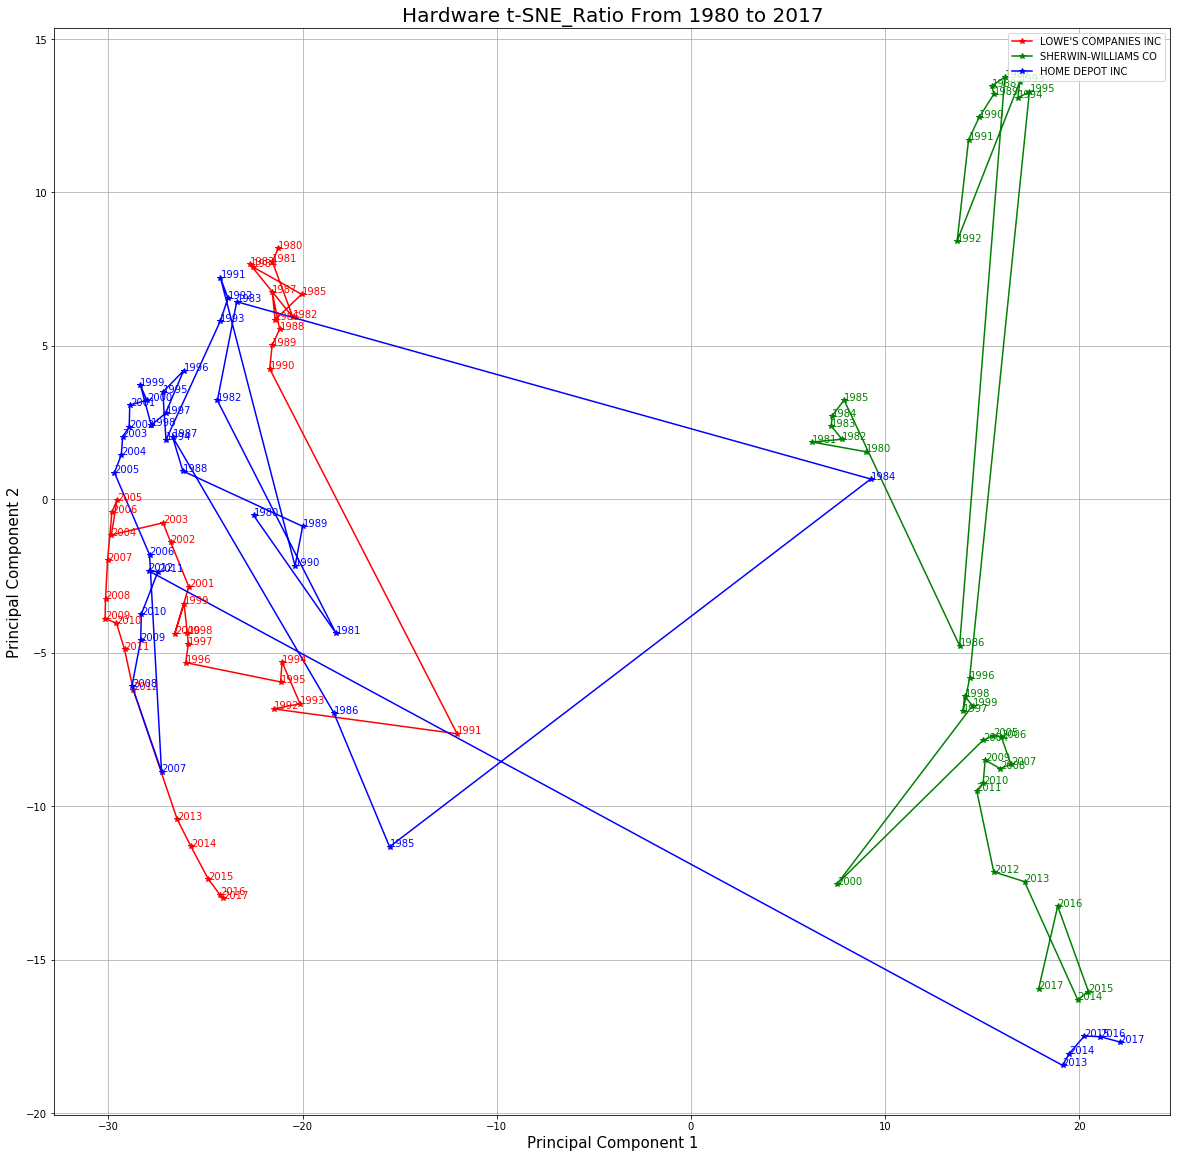

In [311]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Retail Plot 

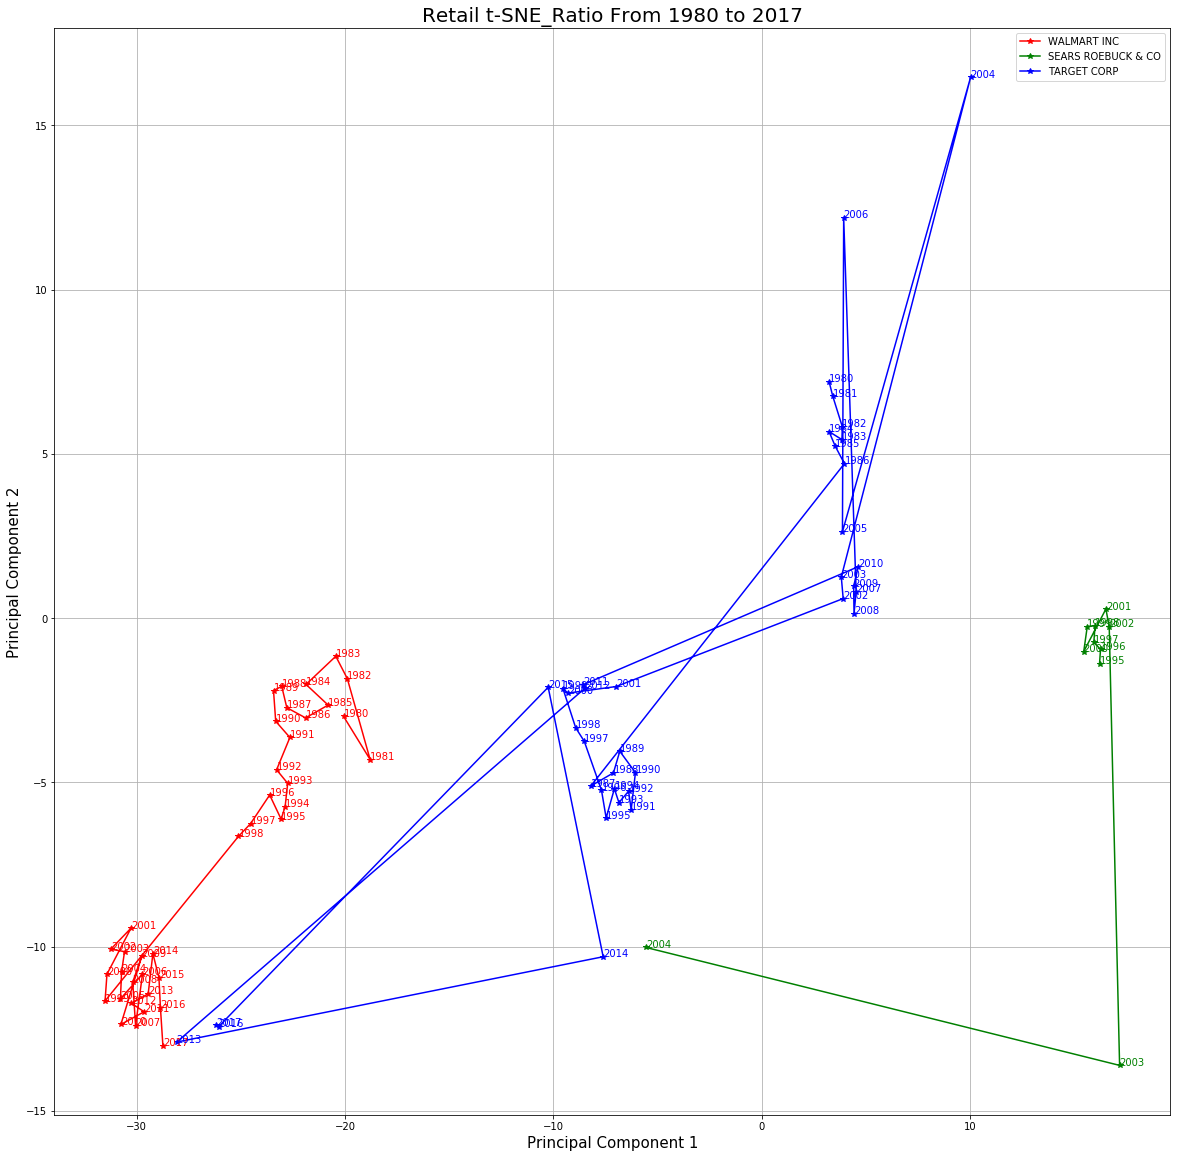

In [313]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Retail t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Retail
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Telecommunication 

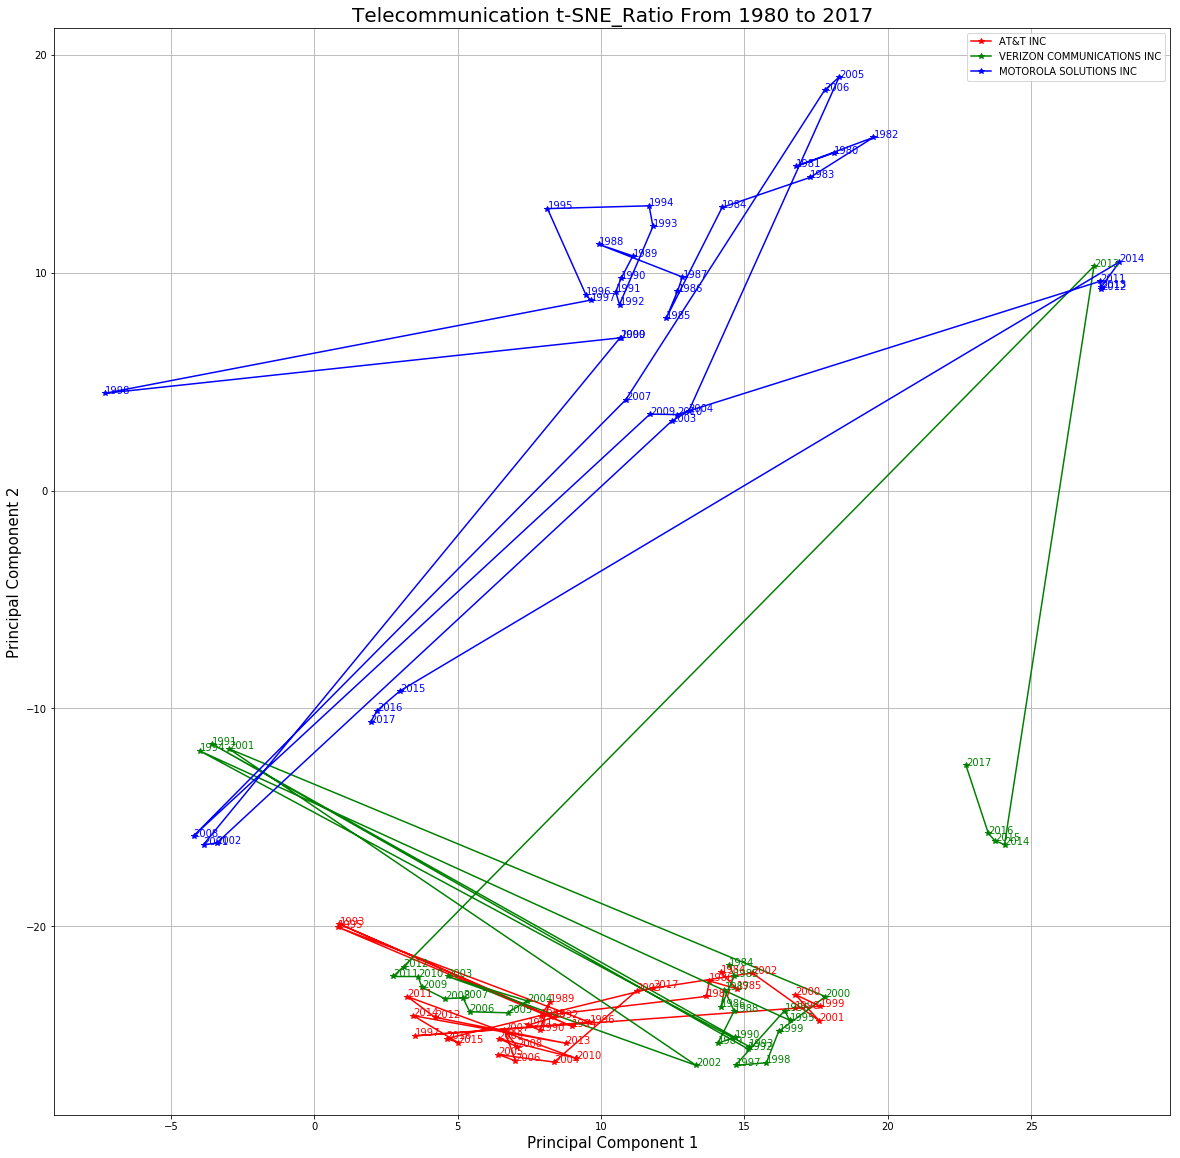

In [314]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Telecommunication t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Telecommunication
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()